# Imports

In [491]:
import numpy as np    # to handle arrays
import pandas as pd   # to load datasets
import statsmodels.api as sm # to create linear models

import matplotlib.pyplot as plt # to create plots or figures
import seaborn as sns # to create plots or figures
from matplotlib.pyplot import subplots # to create plots or figures

from sklearn.linear_model import LinearRegression # to create linear regression model
from sklearn.linear_model import LogisticRegression as logreg # to create logistic regression model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda # linear discriminant analysis
from sklearn.naive_bayes import GaussianNB as nb # Gaussian Naive Bayes
from sklearn.neighbors import KNeighborsClassifier as knn #KNN

from sklearn.model_selection import train_test_split, GridSearchCV # To use to train the model, to test the model and for grid search
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # for accuracy score, confussion matrix and classification report

# Dataset

In [492]:
df = pd.read_csv('student_dropout_academic_success.csv') # Load dataset
df.head() # show the dataset

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5.0,171.0,1.0,1.0,122.0,1.0,19.0,12.0,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1.0,9254.0,1.0,1.0,160.0,1.0,1.0,3.0,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5.0,9070.0,1.0,1.0,122.0,1.0,37.0,37.0,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2.0,9773.0,1.0,1.0,122.0,1.0,38.0,37.0,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1.0,8014.0,0.0,1.0,100.0,1.0,37.0,38.0,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [493]:
df.shape # show the shape of the dataset

(4424, 37)

In [494]:
#check for null values
df.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,1
Course,2
Daytime/evening attendance\t,3
Previous qualification,3
Previous qualification (grade),5
Nacionality,5
Mother's qualification,4
Father's qualification,4


In [495]:
df.shape # show the shape of the dataset

(4424, 37)

In [496]:
# Drop and check for null values
df.dropna(inplace = True)
df.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance\t,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


In [497]:
df.shape # number of samples and features

(4412, 37)

In [498]:
# Drop the predictors for marital status,
df =df.drop(['Marital status', 'Nacionality', 'Application mode', 'Application order', 'GDP', 'Course'], axis = 1)
df.head() # show the dataset without unwanted features

,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,Target
0,1.0,1.0,122.0,19.0,12.0,5.0,9.0,127.3,1.0,0.0,...,0,0,0,0,0,0.000000,0,10.8,1.4,Dropout
1,1.0,1.0,160.0,1.0,3.0,3.0,3.0,142.5,1.0,0.0,...,0,0,6,6,6,13.666667,0,13.9,-0.3,Graduate
2,1.0,1.0,122.0,37.0,37.0,9.0,9.0,124.8,1.0,0.0,...,0,0,6,0,0,0.000000,0,10.8,1.4,Dropout
3,1.0,1.0,122.0,38.0,37.0,5.0,3.0,119.6,1.0,0.0,...,0,0,6,10,5,12.400000,0,9.4,-0.8,Graduate
4,0.0,1.0,100.0,37.0,38.0,9.0,9.0,141.5,0.0,0.0,...,0,0,6,6,6,13.000000,0,13.9,-0.3,Graduate


In [499]:
df.Target.unique() # Show unique values for Target

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [500]:
df['Target'].replace(['Dropout','Graduate','Enrolled'], [0,1,2], inplace = True) # Replace values for Target
df.head() # show the values

<ipython-input-500-cb798e55ef20>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Target'].replace(['Dropout','Graduate','Enrolled'], [0,1,2], inplace = True) # Replace values for Target
<ipython-input-500-cb798e55ef20>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Target'].replace(['Drop

,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,Target
0,1.0,1.0,122.0,19.0,12.0,5.0,9.0,127.3,1.0,0.0,...,0,0,0,0,0,0.000000,0,10.8,1.4,0
1,1.0,1.0,160.0,1.0,3.0,3.0,3.0,142.5,1.0,0.0,...,0,0,6,6,6,13.666667,0,13.9,-0.3,1
2,1.0,1.0,122.0,37.0,37.0,9.0,9.0,124.8,1.0,0.0,...,0,0,6,0,0,0.000000,0,10.8,1.4,0
3,1.0,1.0,122.0,38.0,37.0,5.0,3.0,119.6,1.0,0.0,...,0,0,6,10,5,12.400000,0,9.4,-0.8,1
4,0.0,1.0,100.0,37.0,38.0,9.0,9.0,141.5,0.0,0.0,...,0,0,6,6,6,13.000000,0,13.9,-0.3,1


In [501]:
def analyze_column(data, column, target_column):
  """Analyze a single column against the target."""
  # Scatter plot
  plt.figure(figsize=(8, 6))
  sns.scatterplot(data=data, x=column, y=target_column)
  plt.title(f'{column} vs {target_column}')
  plt.xlabel(column)
  plt.ylabel(target_column)
  plt.show()

  # Box plot
  plt.figure(figsize=(8, 6))
  sns.boxplot(data=data, x=target_column, y=column)
  plt.title(f'{column} vs {target_column}')
  plt.xlabel(target_column)
  plt.ylabel(column)
  plt.show()

  # # Histogram
  plt.figure(figsize=(8, 6))
  sns.histplot(data[column], kde=True)
  plt.title(f'{column} Distribution')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()

  # Correlation
  correlation = data[[column, target_column]].corr().iloc[0, 1]
  print(f'Correlation between {column} and {target_column}: {correlation}')

def analyze_all_columns(data, target_column):
  """Analyze all columns against the target."""
  feature_columns = [col for col in data.columns if col != target_column]
  for column in feature_columns:
    analyze_column(data, column, target_column)

def residuals_plot(model):
  ax = subplots(figsize=(8,8))[1]
  ax.scatter(model.fittedvalues, model.resid)
  ax.set_xlabel('Fitted value')
  ax.set_ylabel('Residual')
  ax.axhline(0, c='k', ls='--');

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


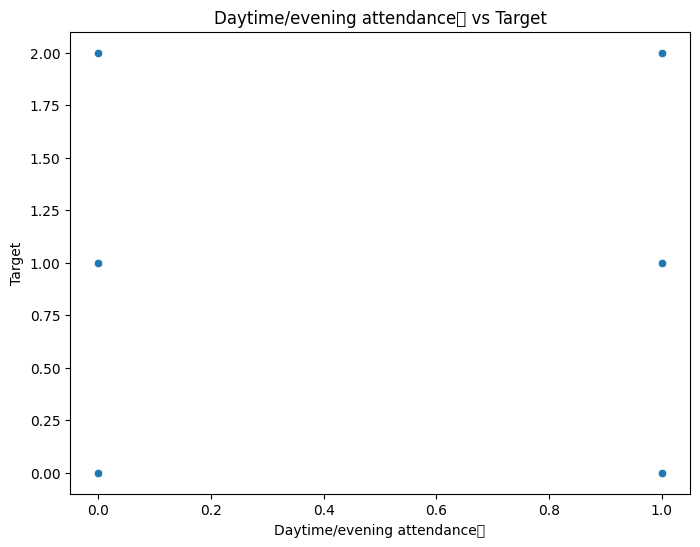

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


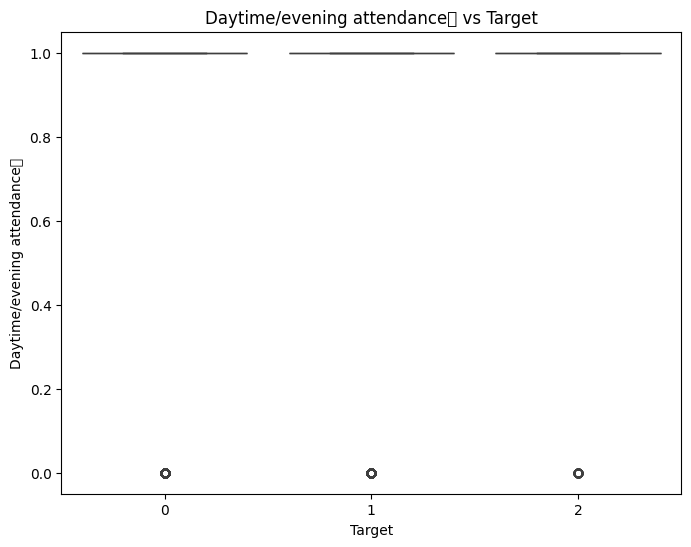

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


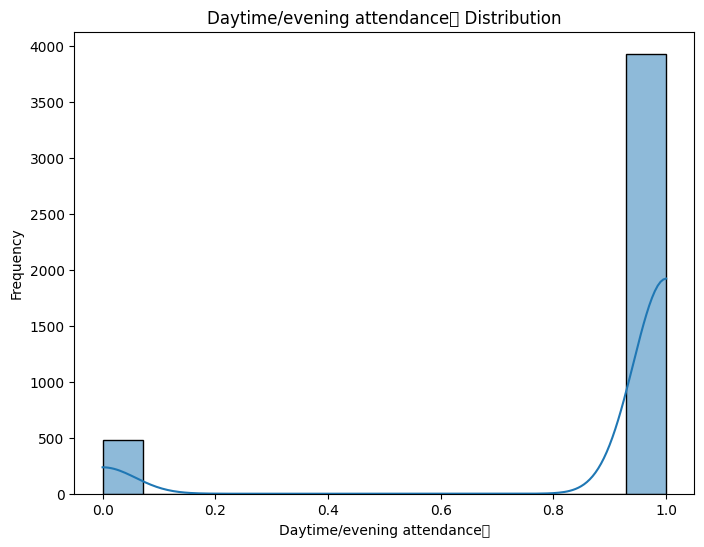

Correlation between Daytime/evening attendance	 and Target: 0.06657315099941236


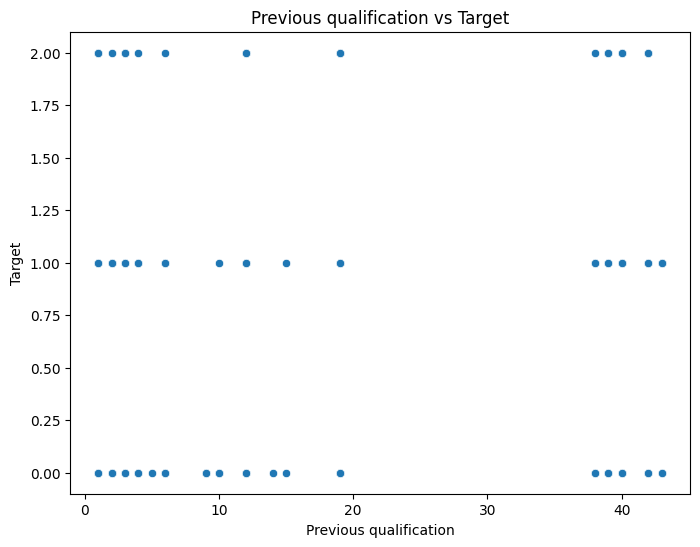

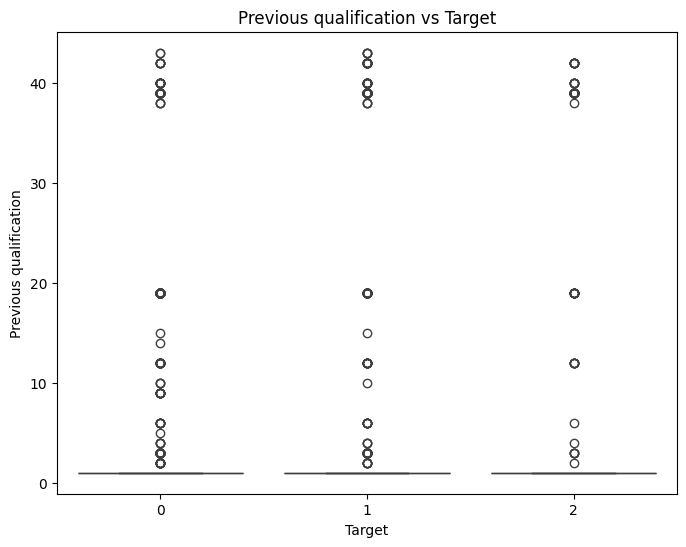

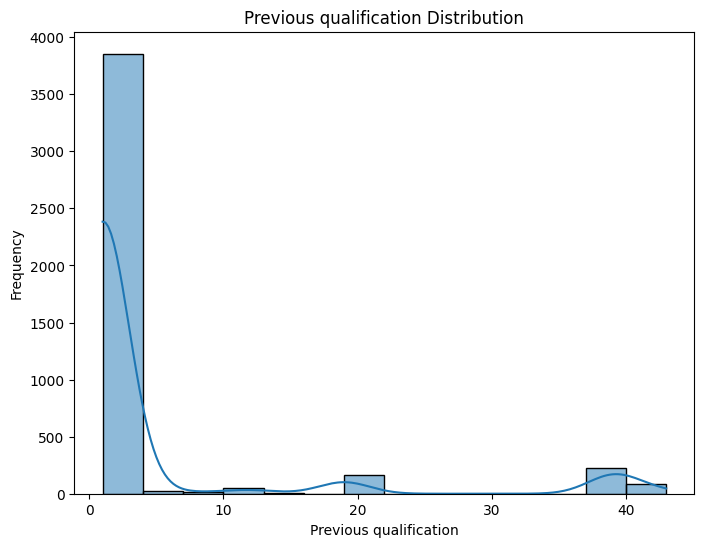

Correlation between Previous qualification and Target: -0.028148111512909194


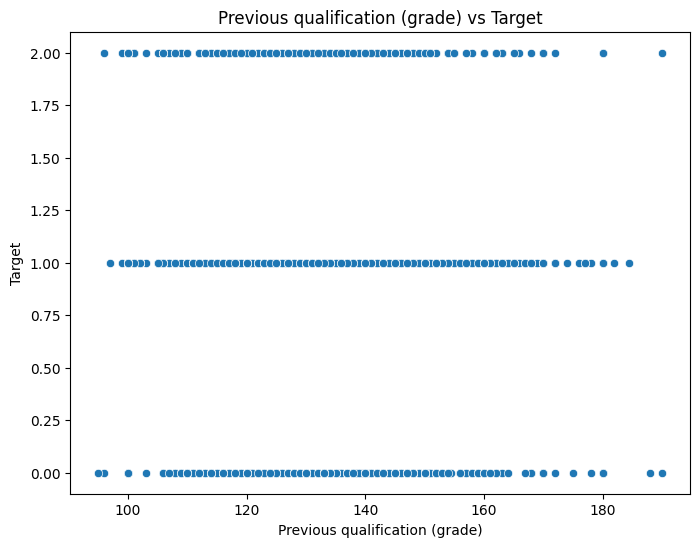

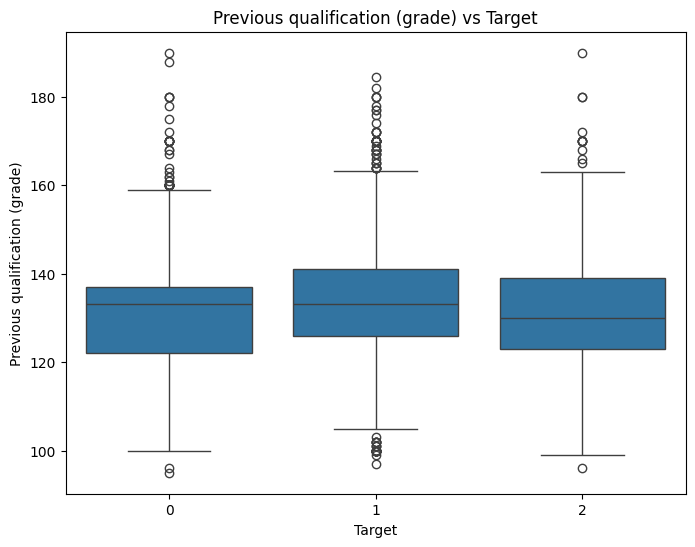

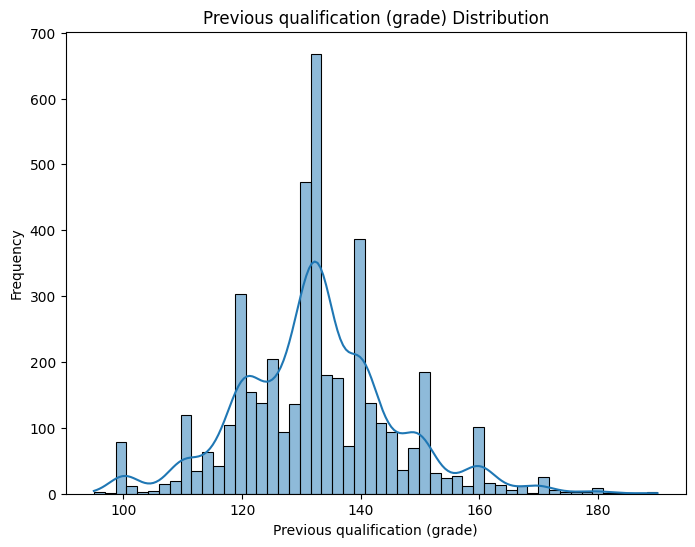

Correlation between Previous qualification (grade) and Target: 0.025107845625492942


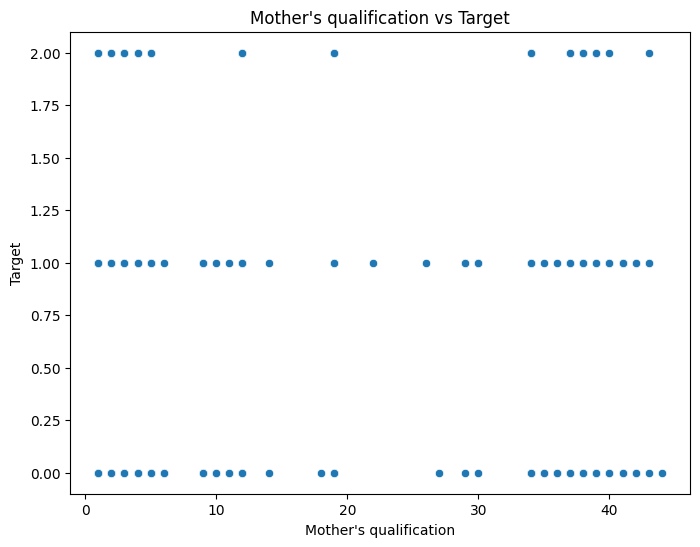

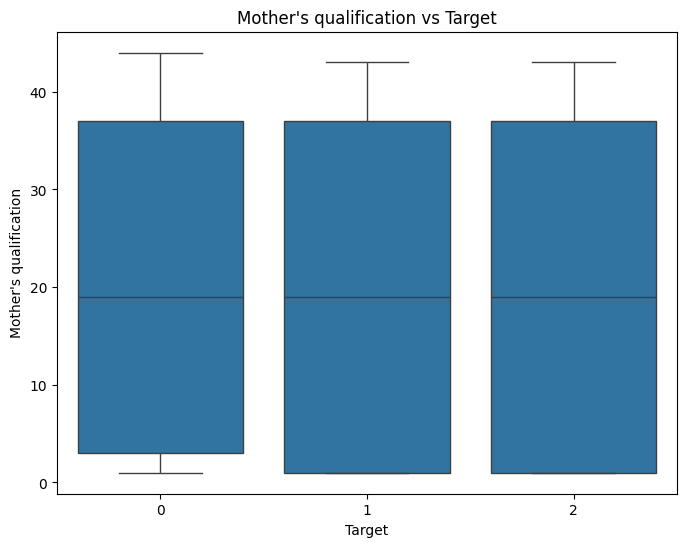

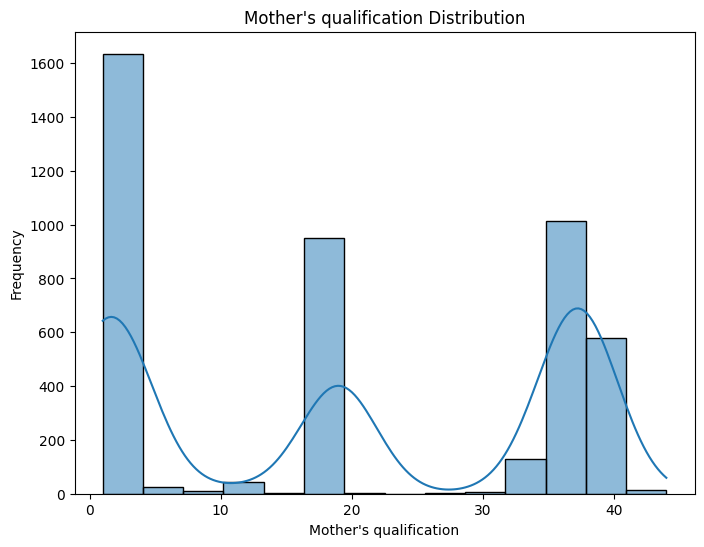

Correlation between Mother's qualification and Target: -0.07705583499883098


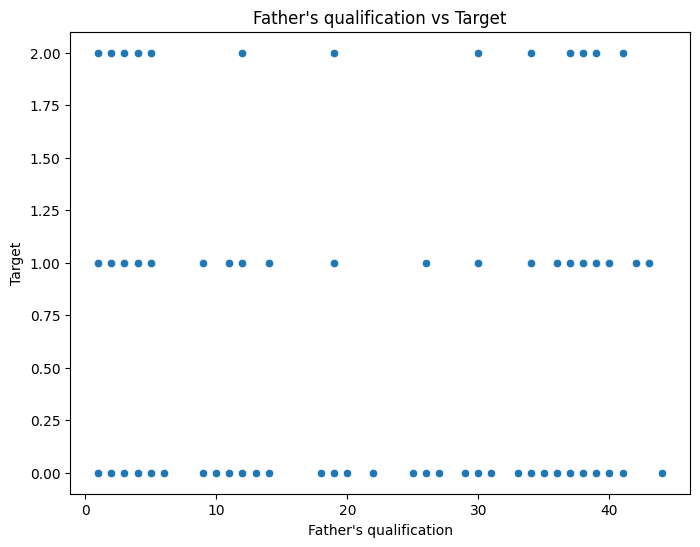

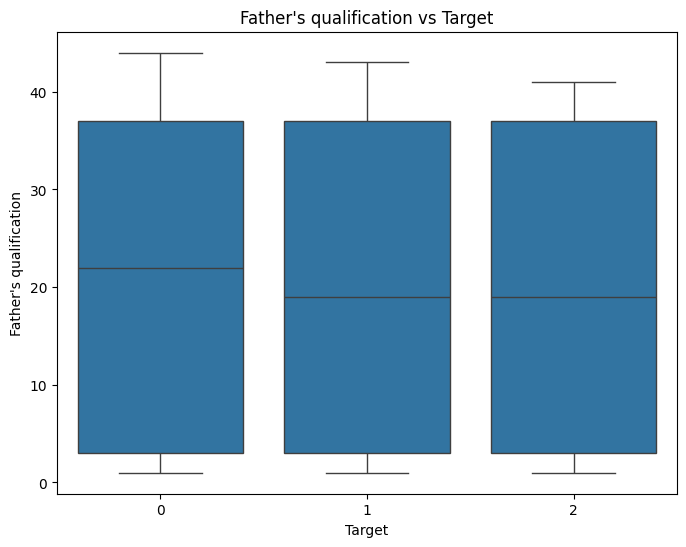

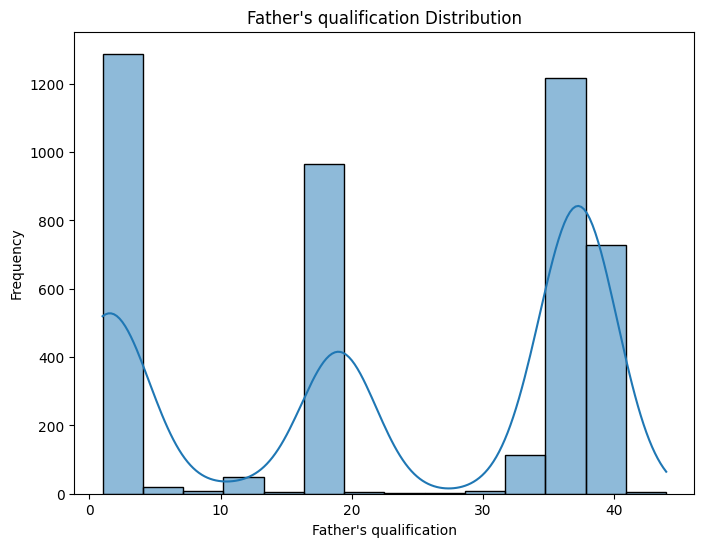

Correlation between Father's qualification and Target: -0.03588342886001681


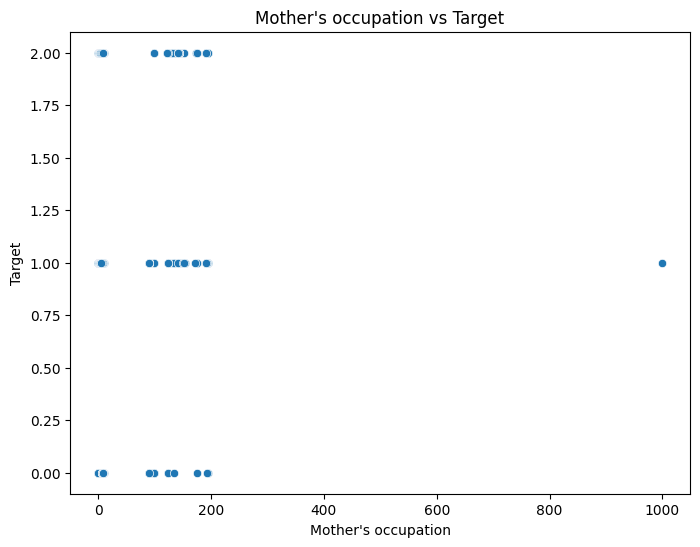

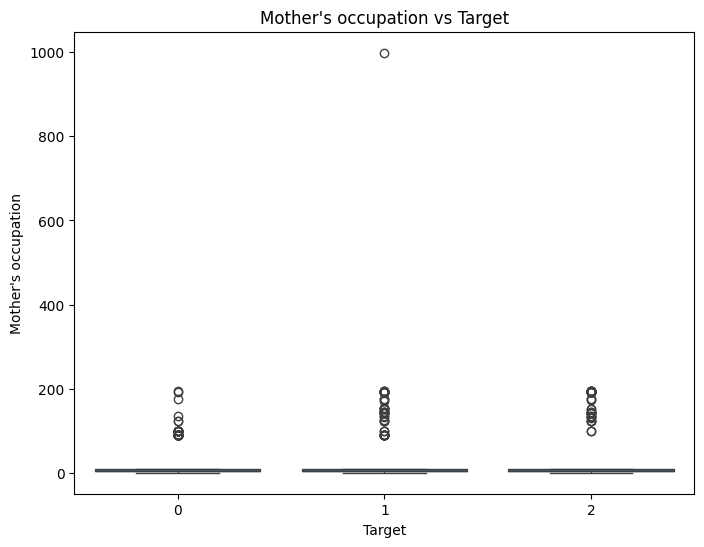

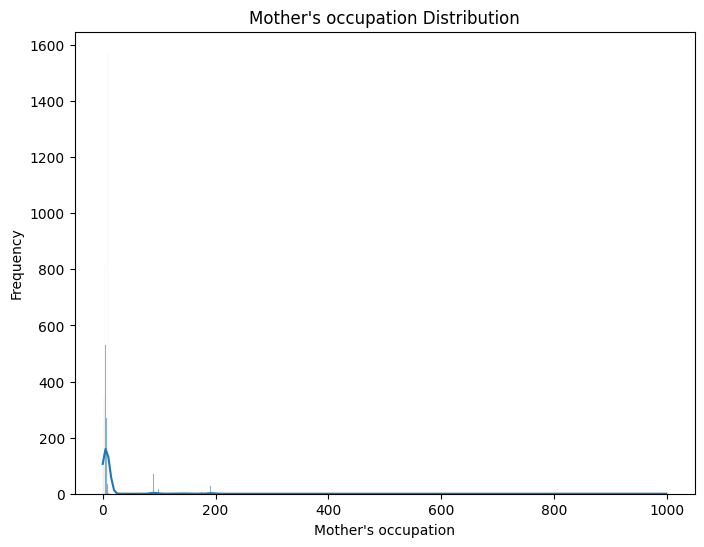

Correlation between Mother's occupation and Target: 0.04660384397710006


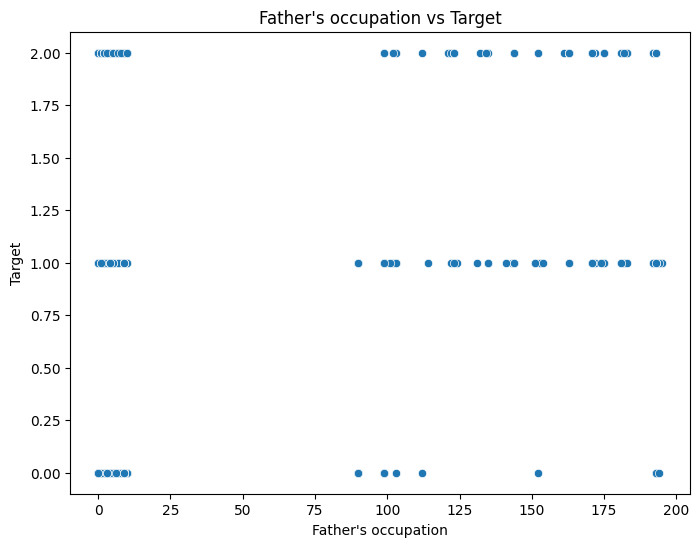

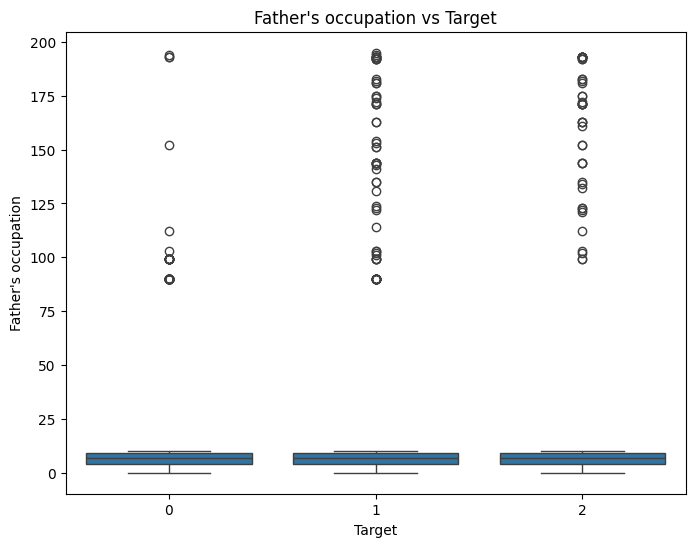

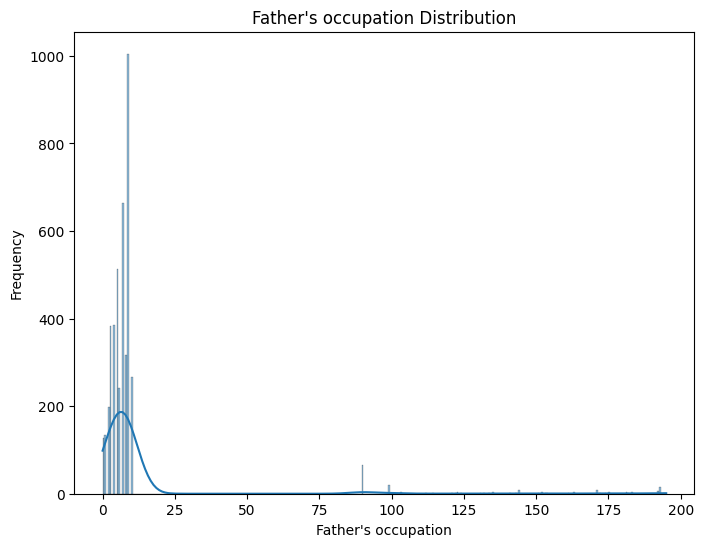

Correlation between Father's occupation and Target: 0.05154793521528903


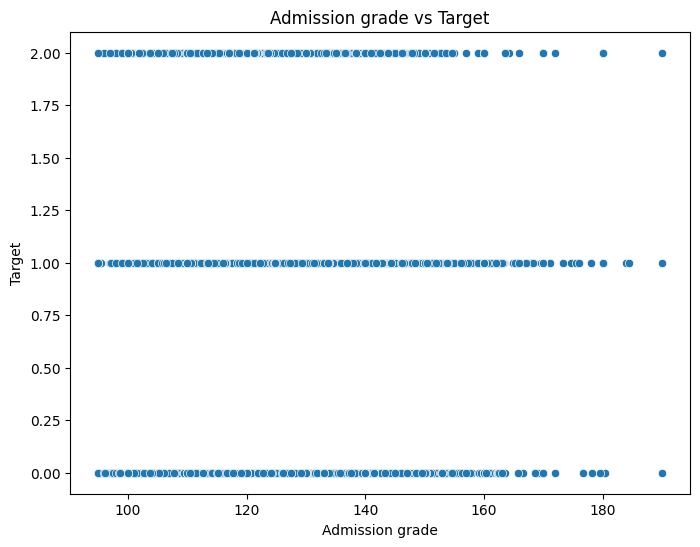

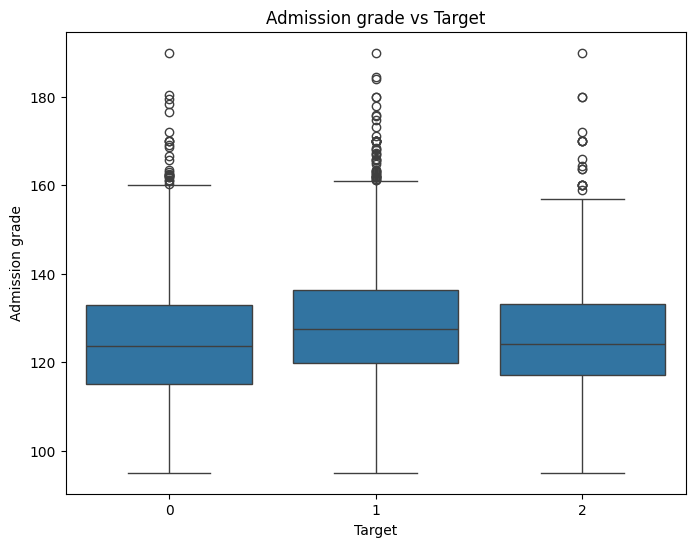

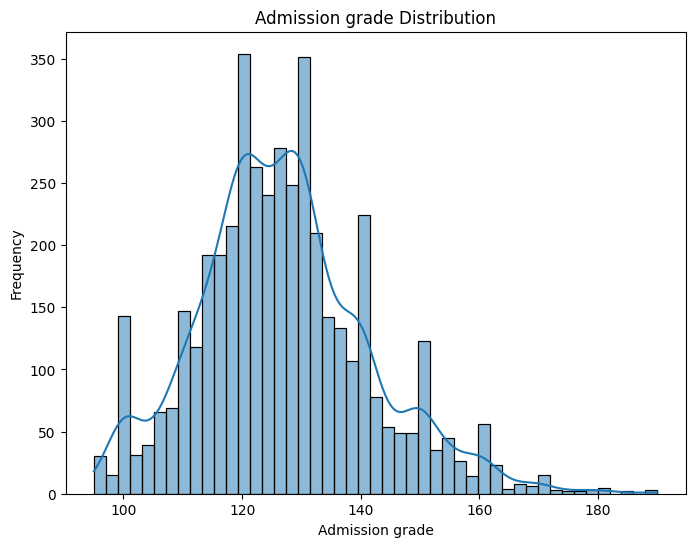

Correlation between Admission grade and Target: 0.039727405228967665


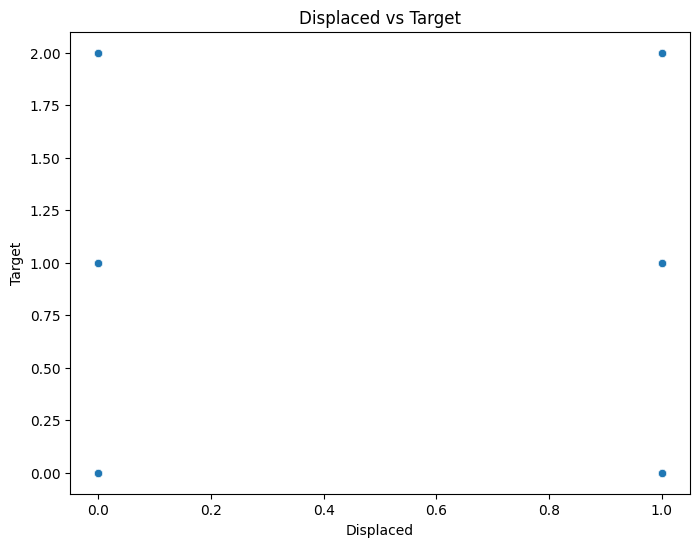

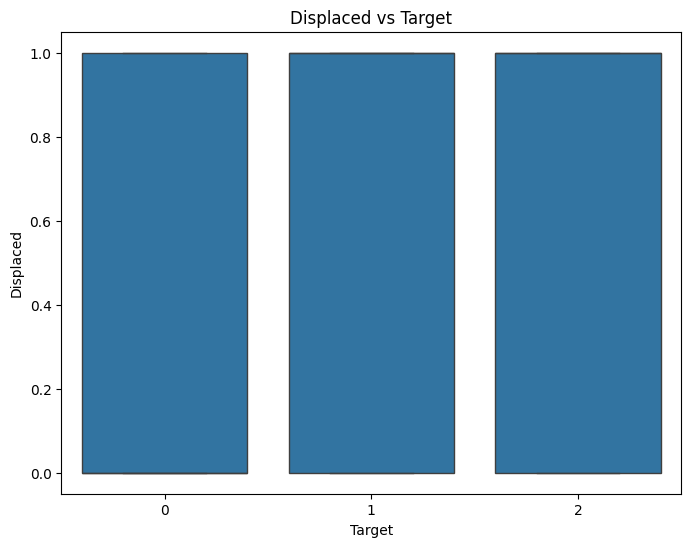

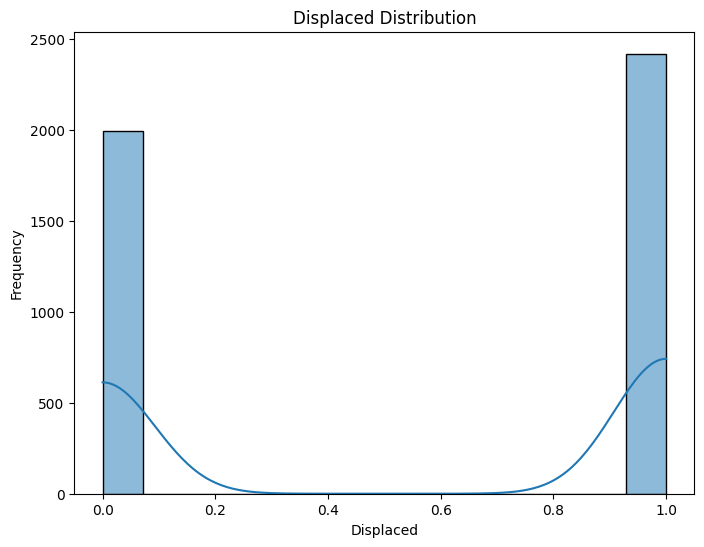

Correlation between Displaced and Target: 0.06988657008298164


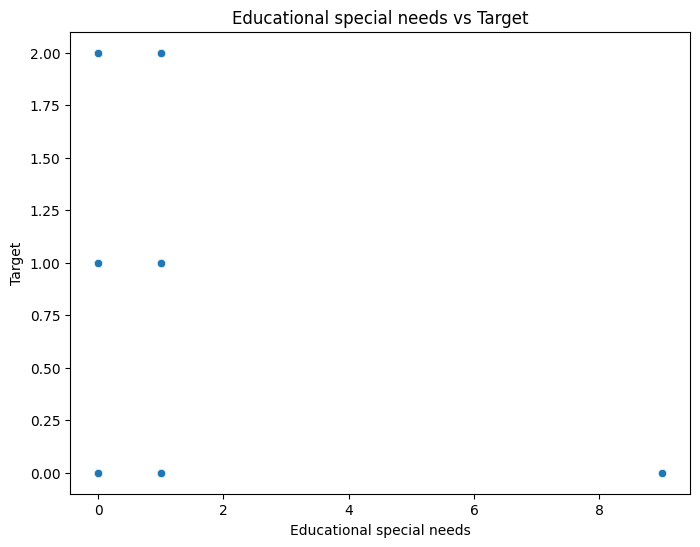

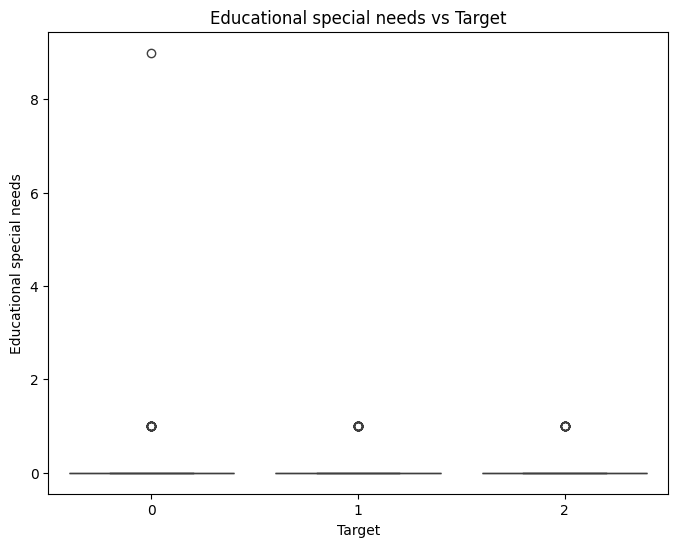

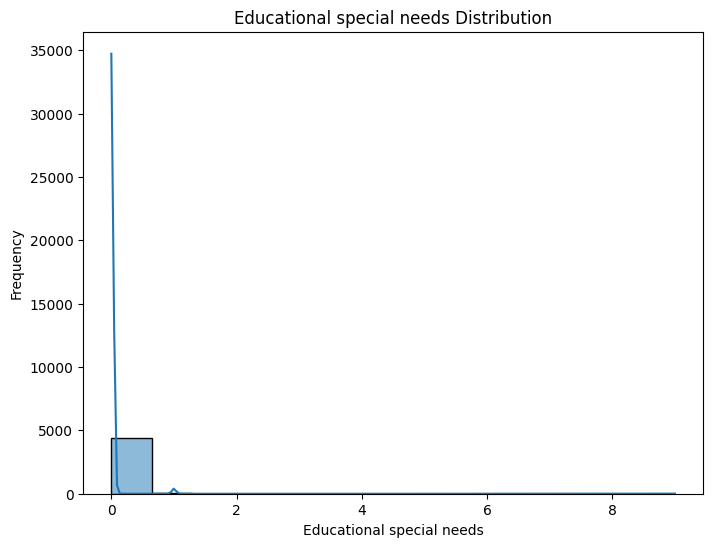

Correlation between Educational special needs and Target: -0.012325024225272182


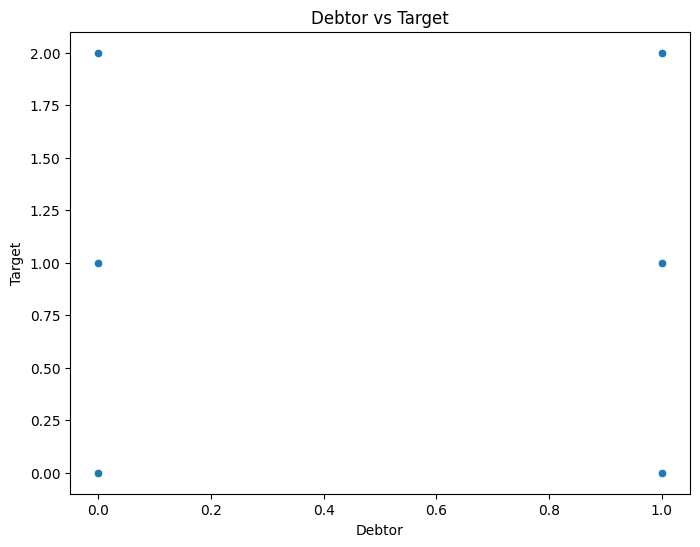

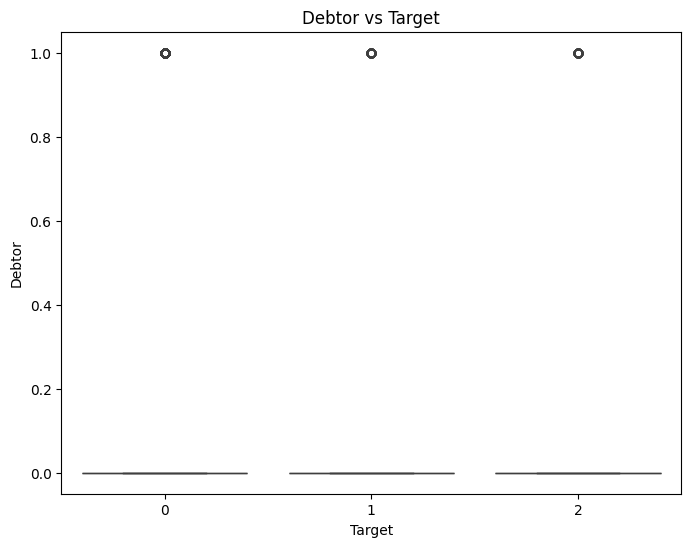

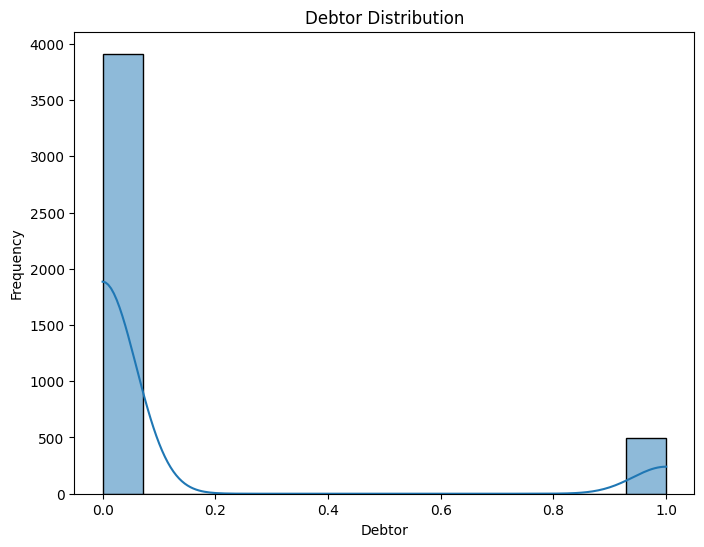

Correlation between Debtor and Target: -0.15309950767132


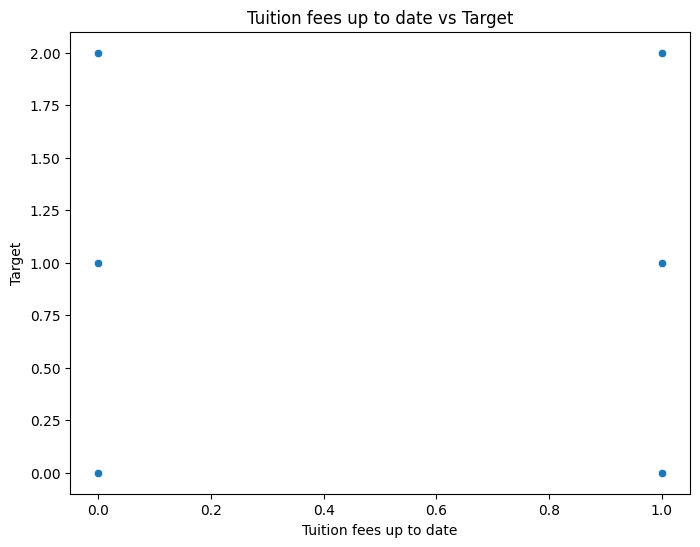

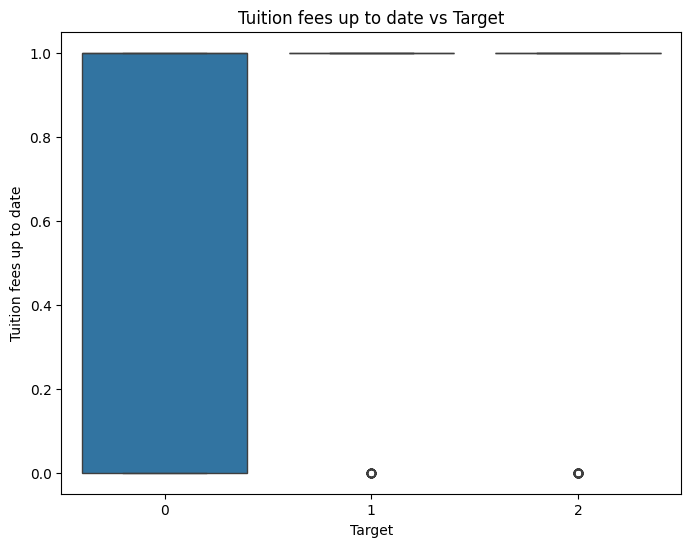

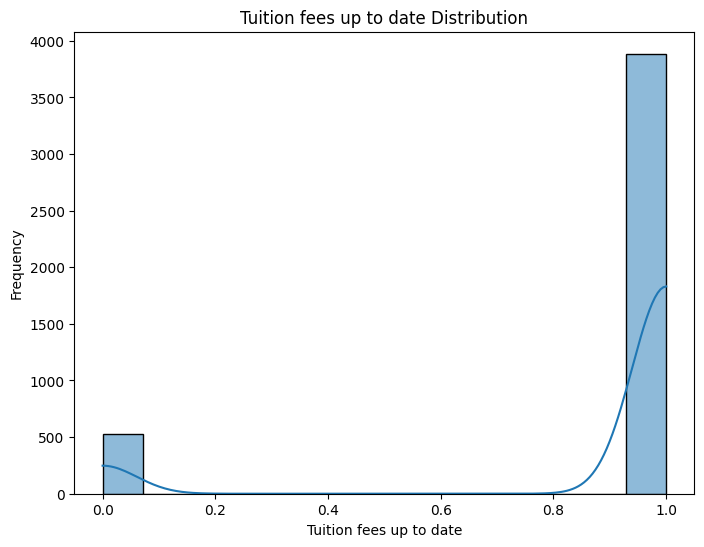

Correlation between Tuition fees up to date and Target: 0.34150771137434893


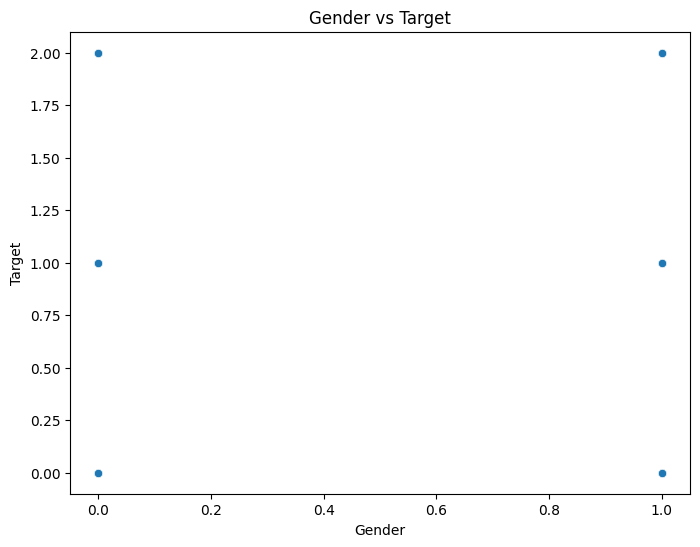

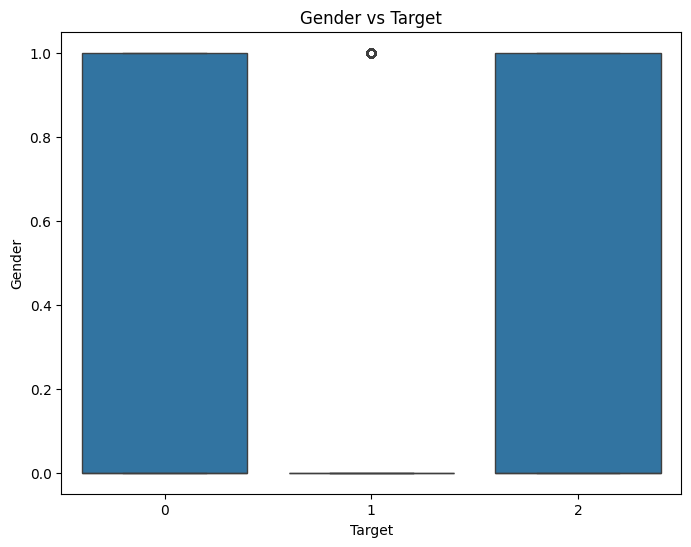

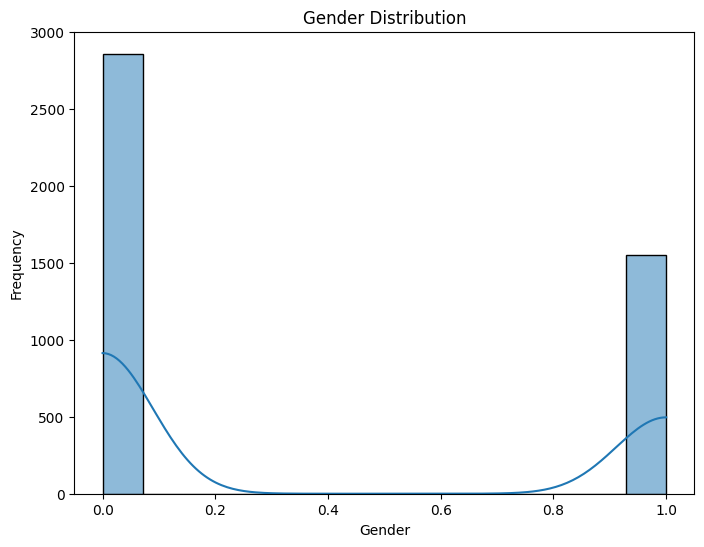

Correlation between Gender and Target: -0.11979979561632506


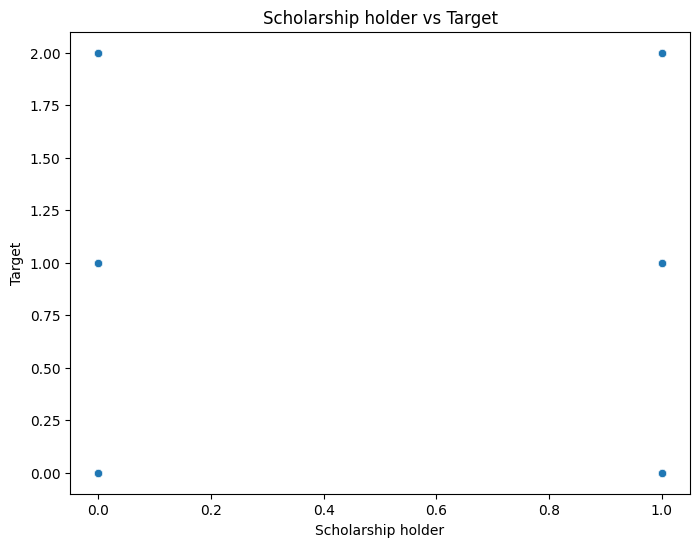

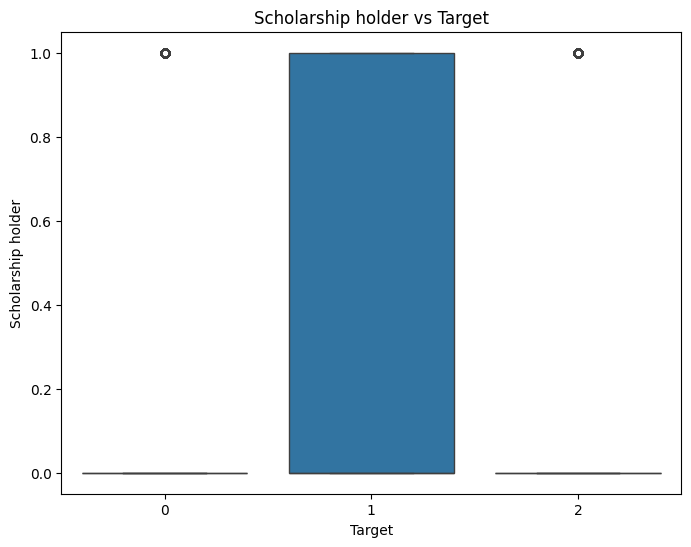

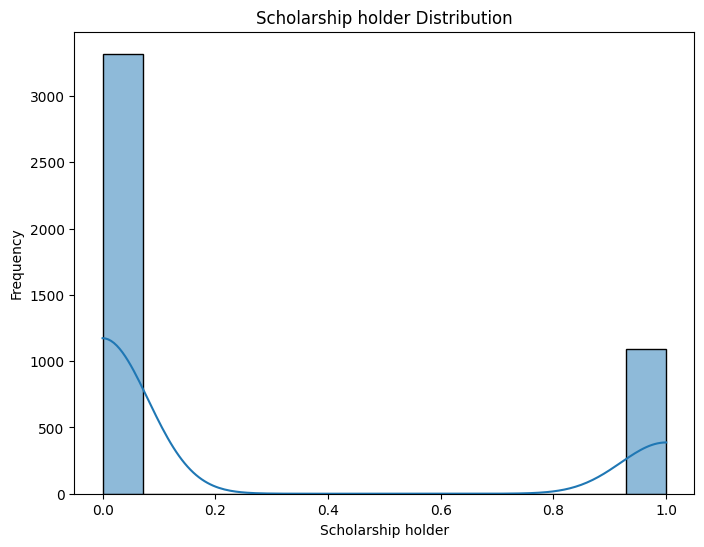

Correlation between Scholarship holder and Target: 0.1150609330087702


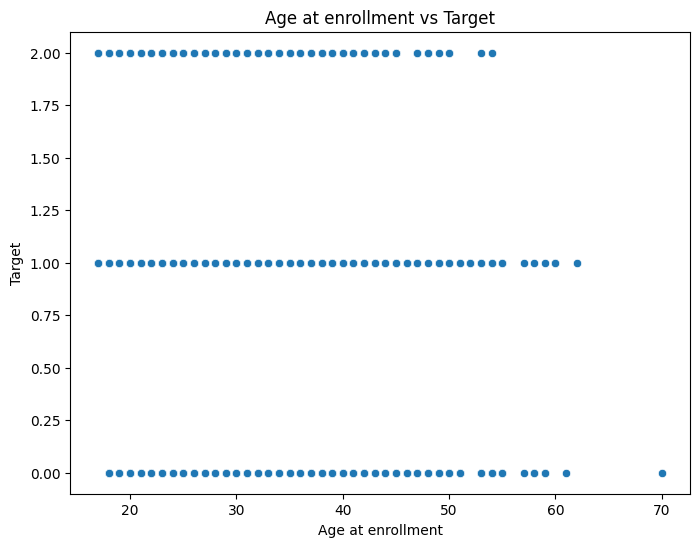

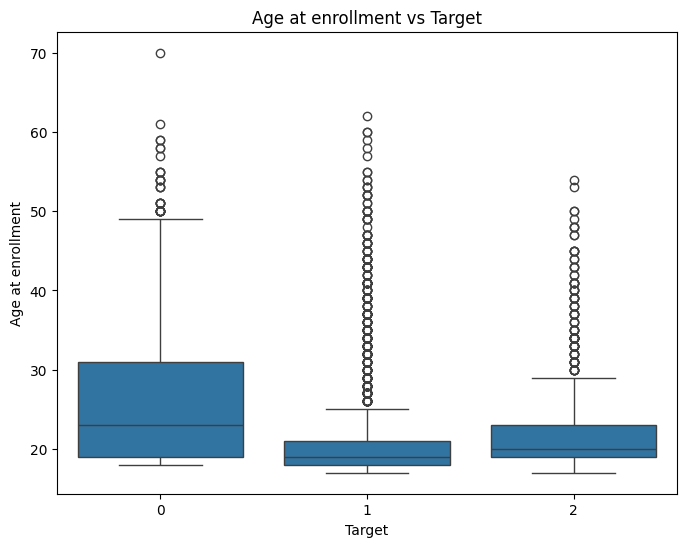

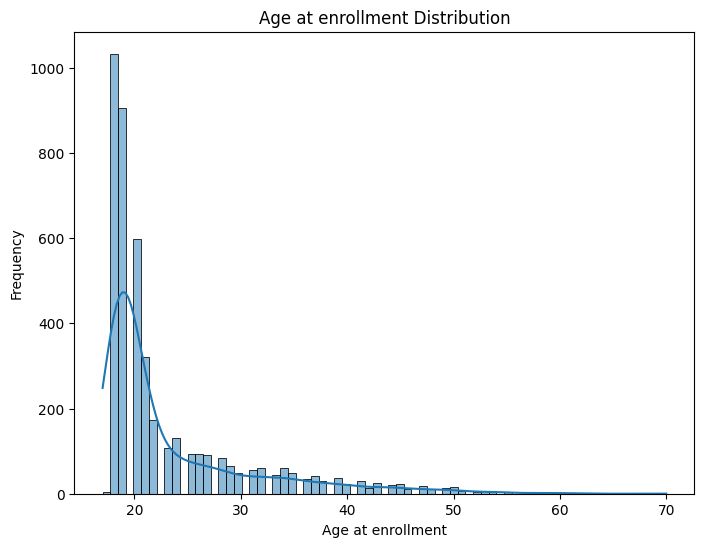

Correlation between Age at enrollment and Target: -0.20251072662073447


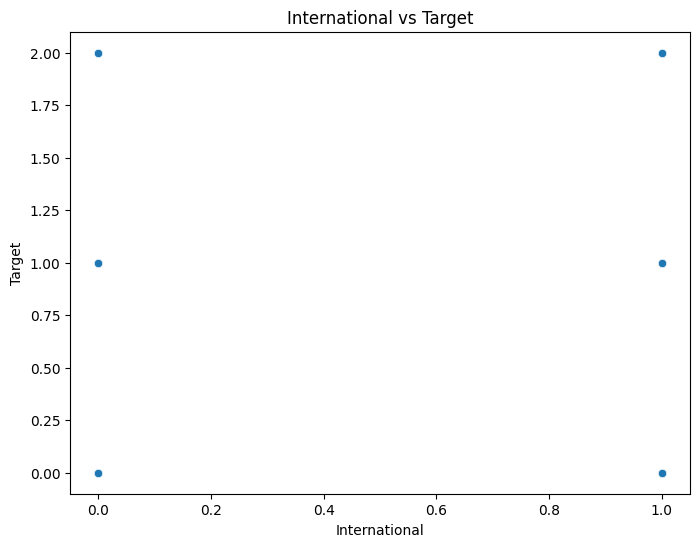

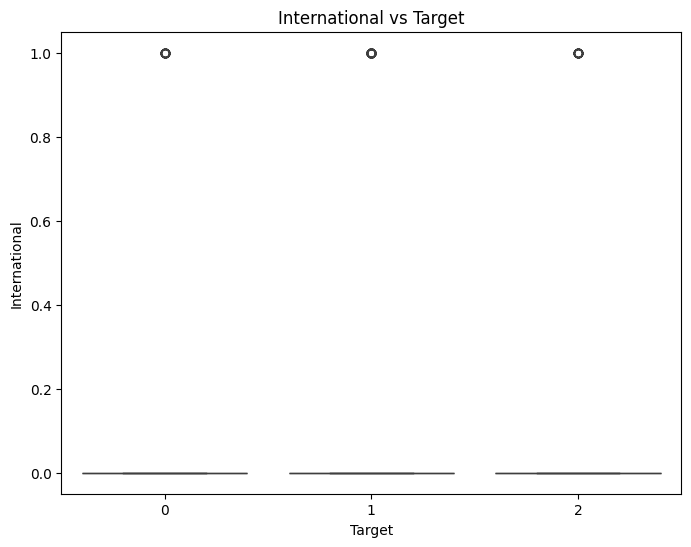

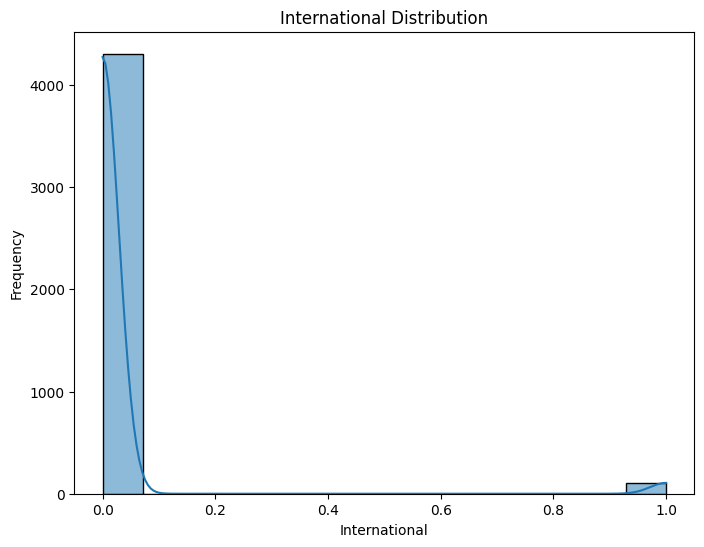

Correlation between International and Target: 0.01946265300557591


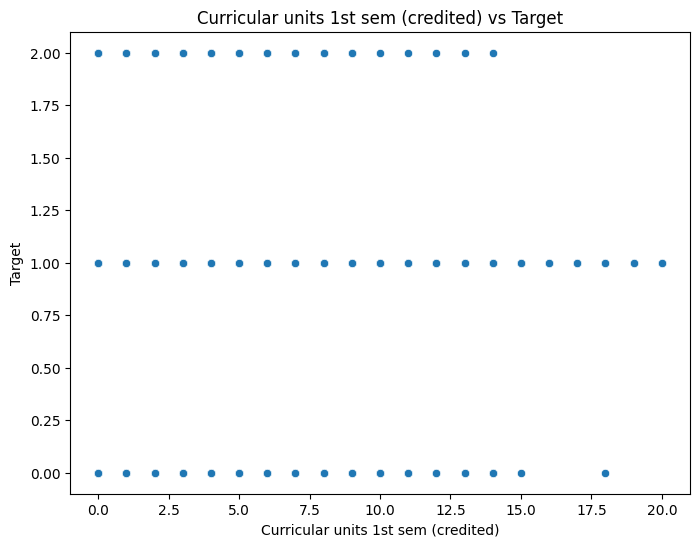

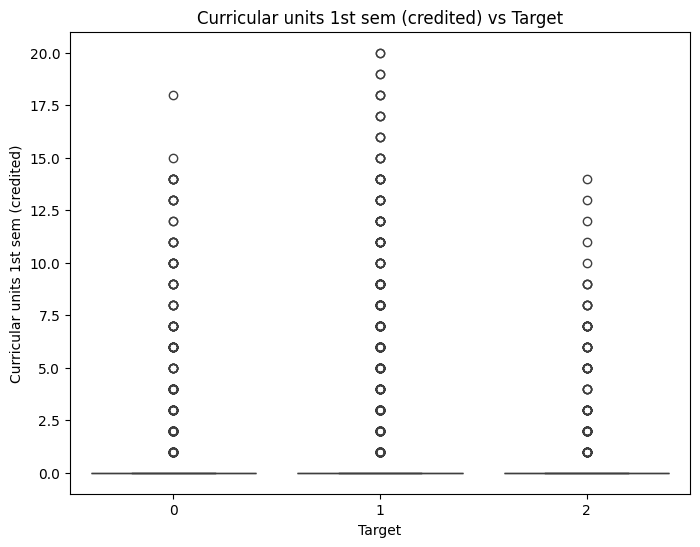

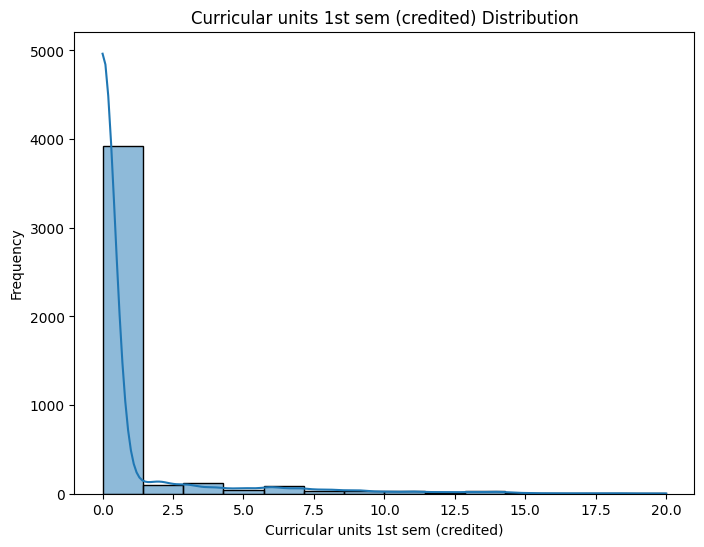

Correlation between Curricular units 1st sem (credited) and Target: -0.00249701452355901


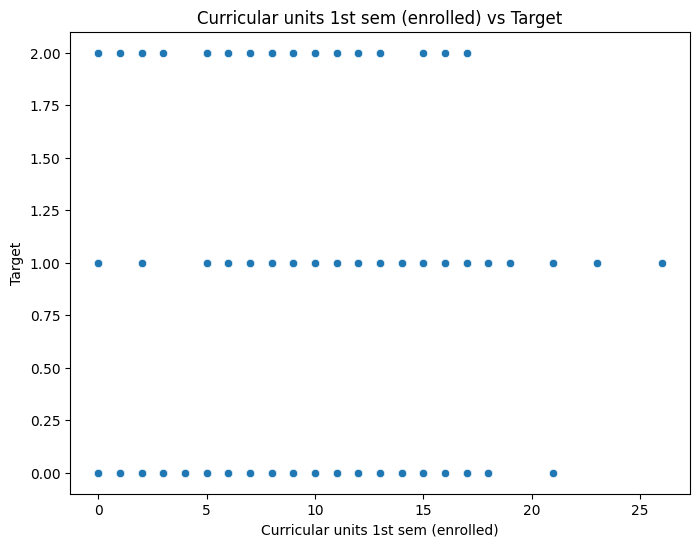

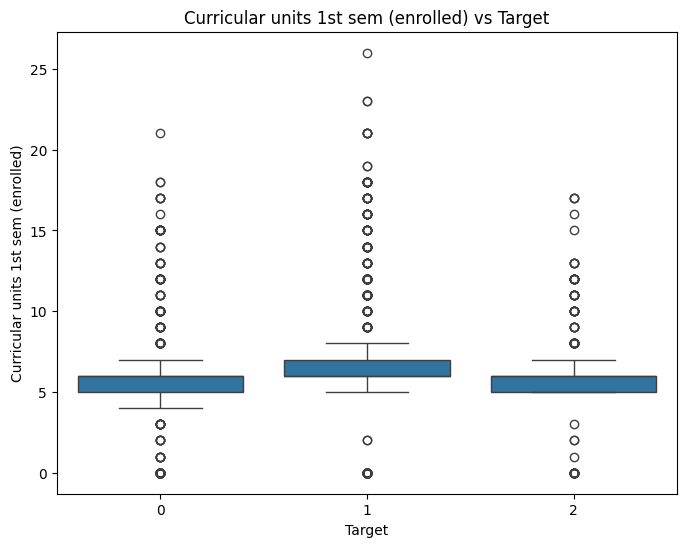

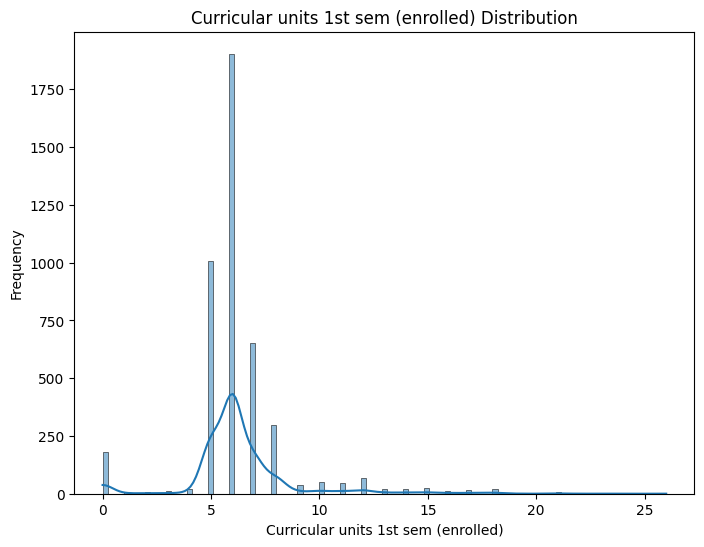

Correlation between Curricular units 1st sem (enrolled) and Target: 0.051915520962764236


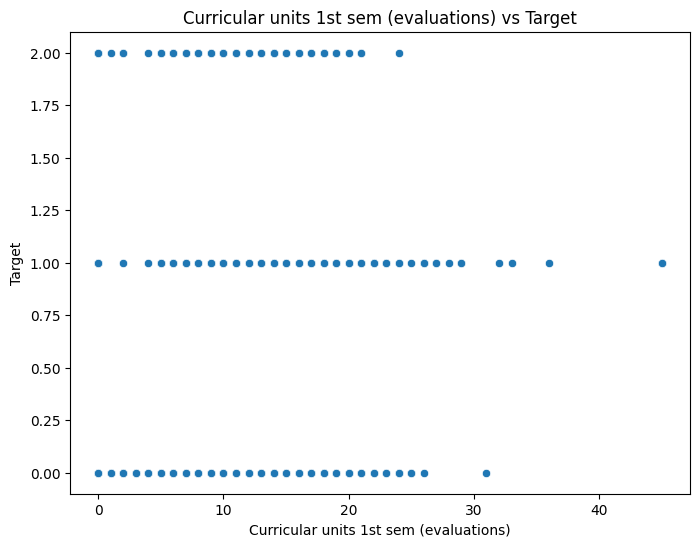

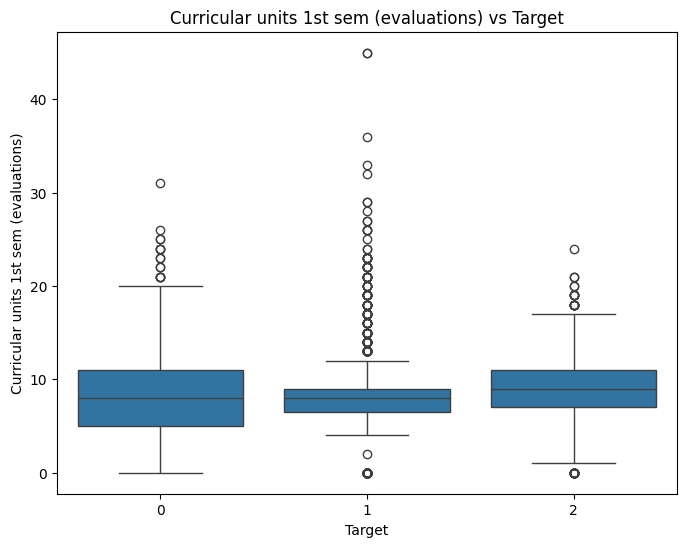

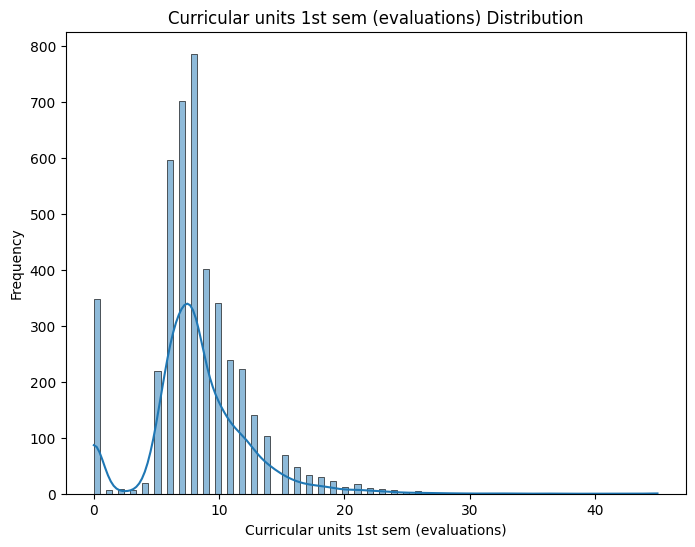

Correlation between Curricular units 1st sem (evaluations) and Target: 0.1255706017085549


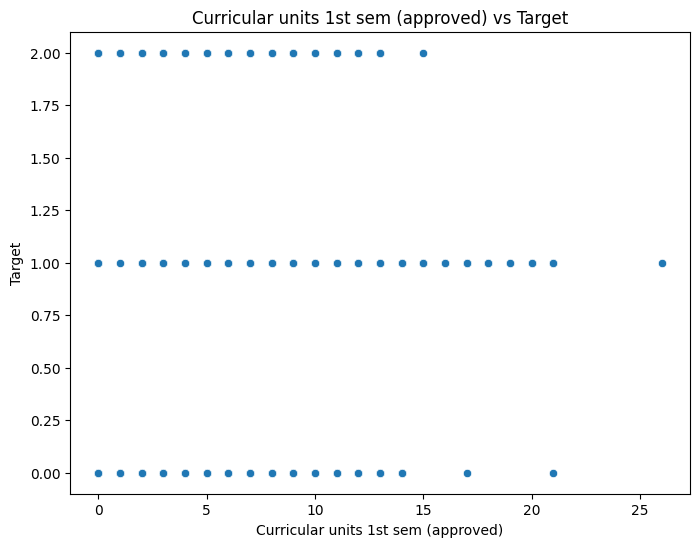

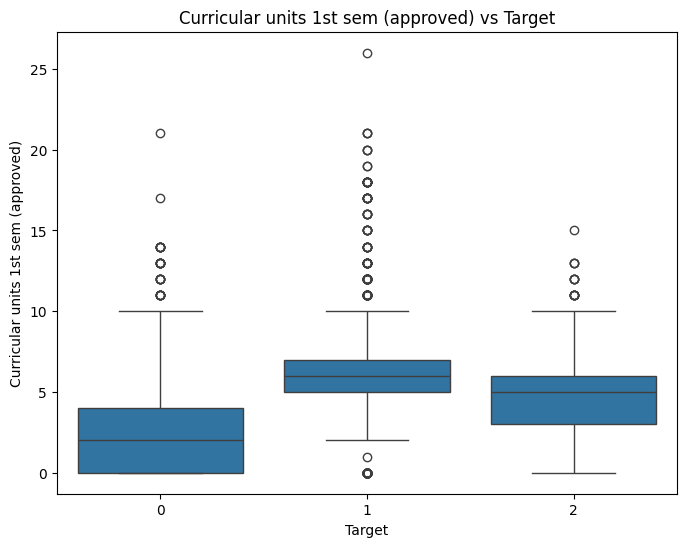

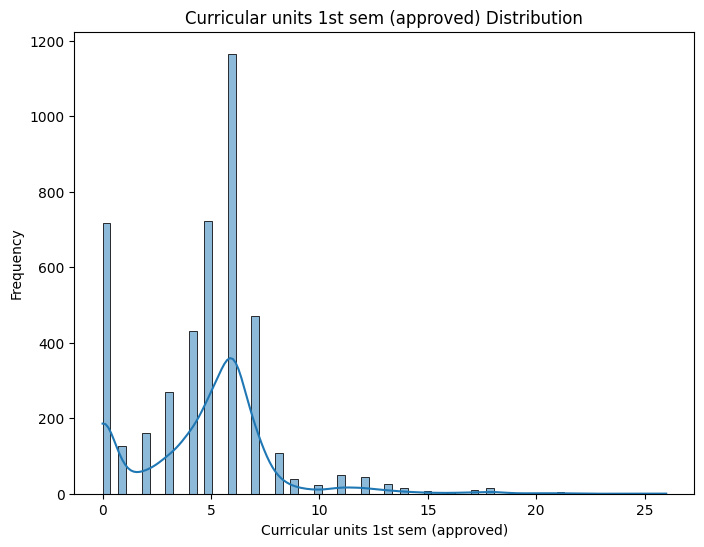

Correlation between Curricular units 1st sem (approved) and Target: 0.2895197192316415


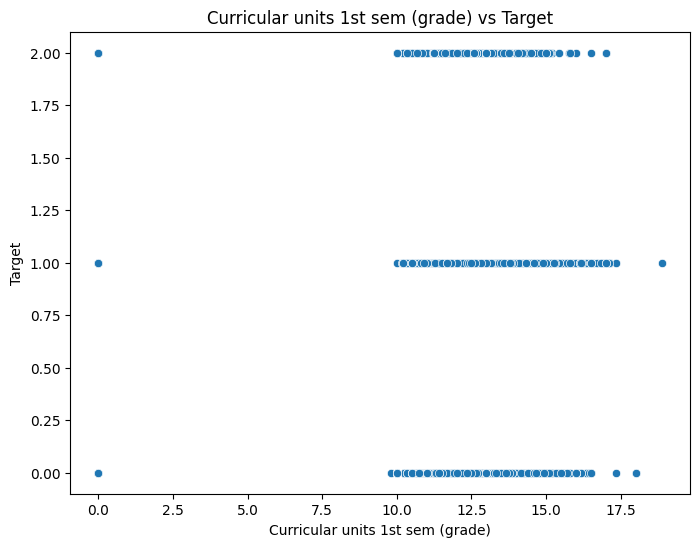

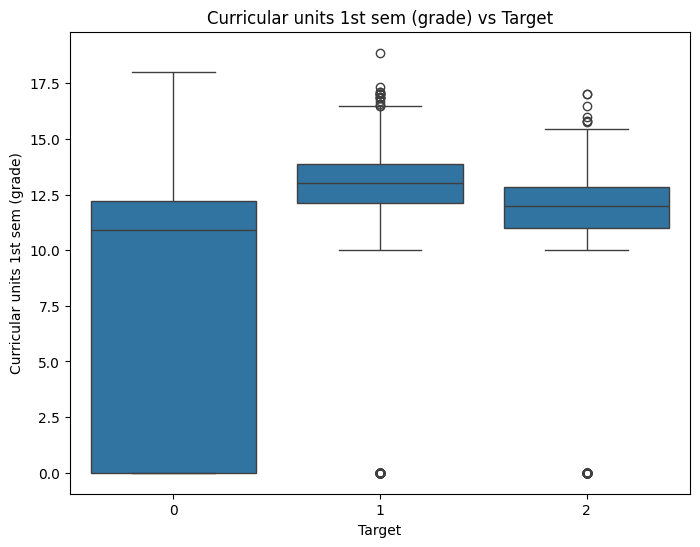

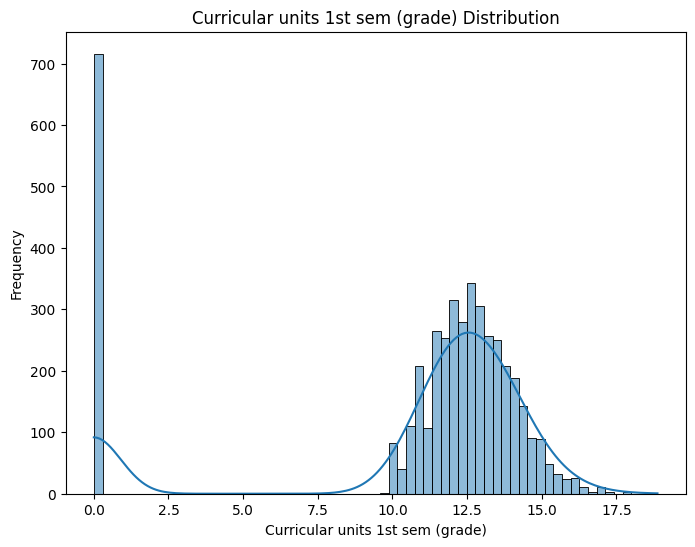

Correlation between Curricular units 1st sem (grade) and Target: 0.34913628981541056


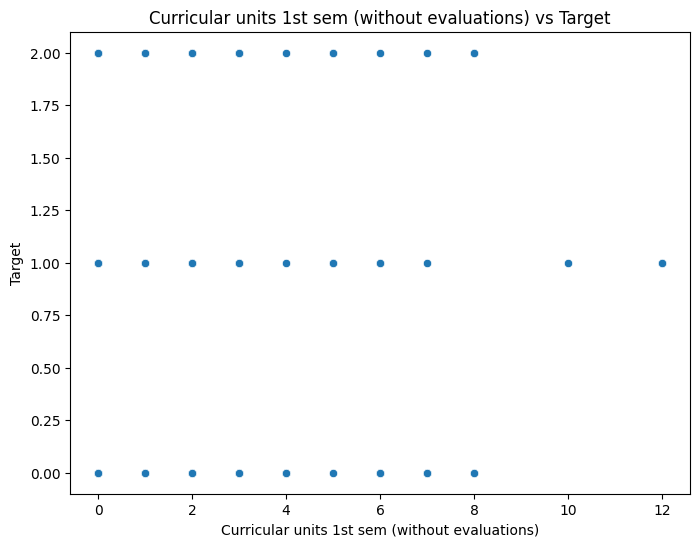

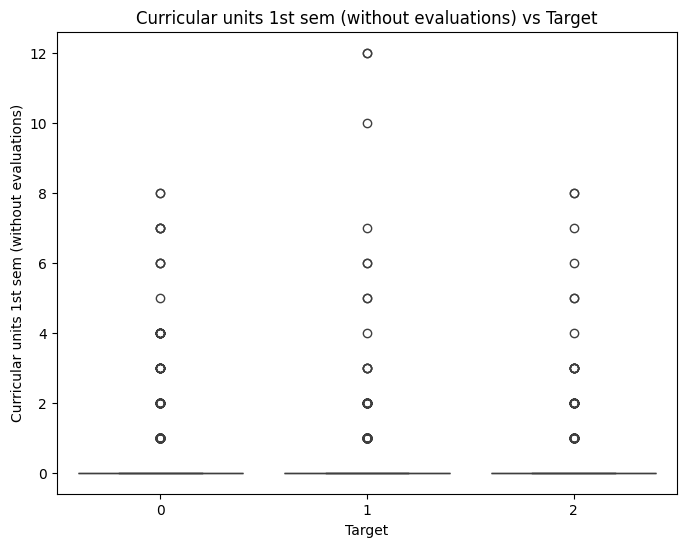

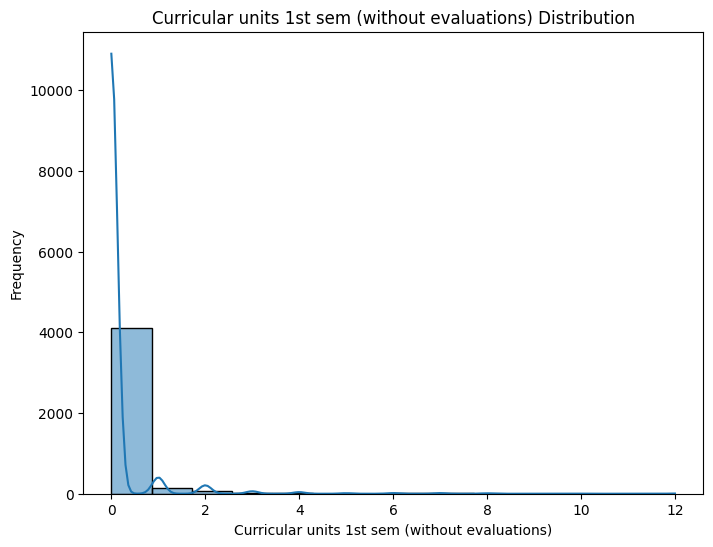

Correlation between Curricular units 1st sem (without evaluations) and Target: -0.02161445583403877


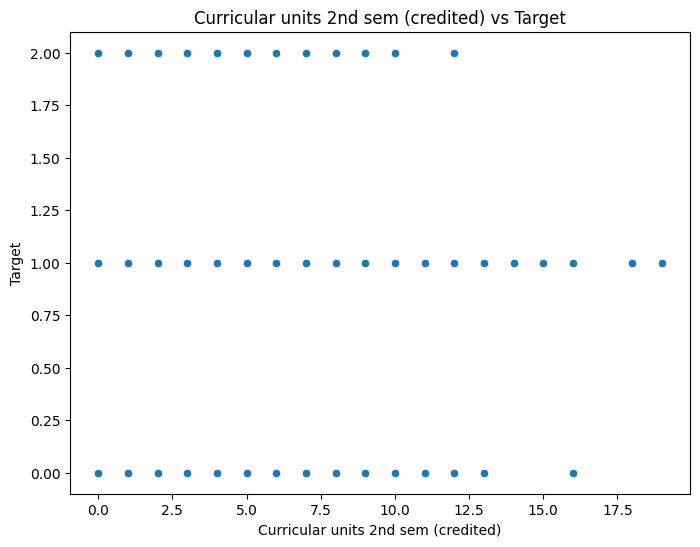

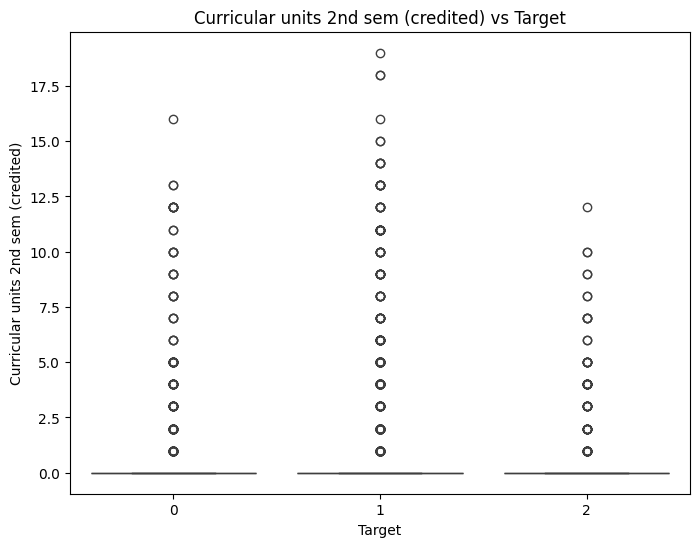

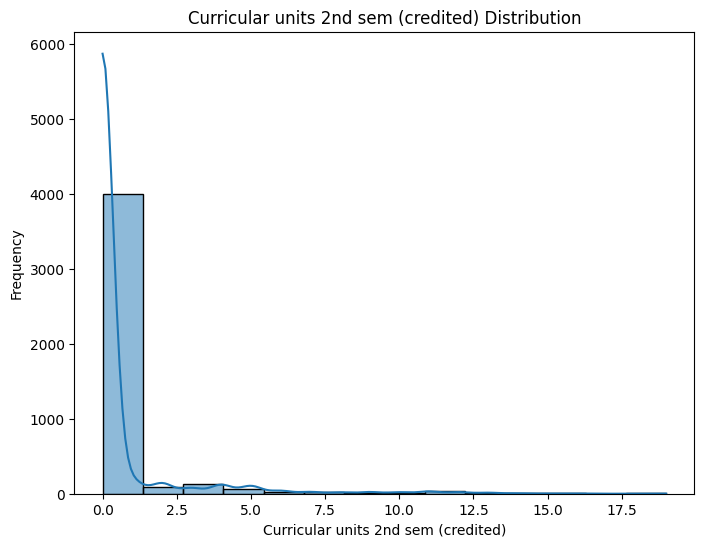

Correlation between Curricular units 2nd sem (credited) and Target: -0.002458452129557389


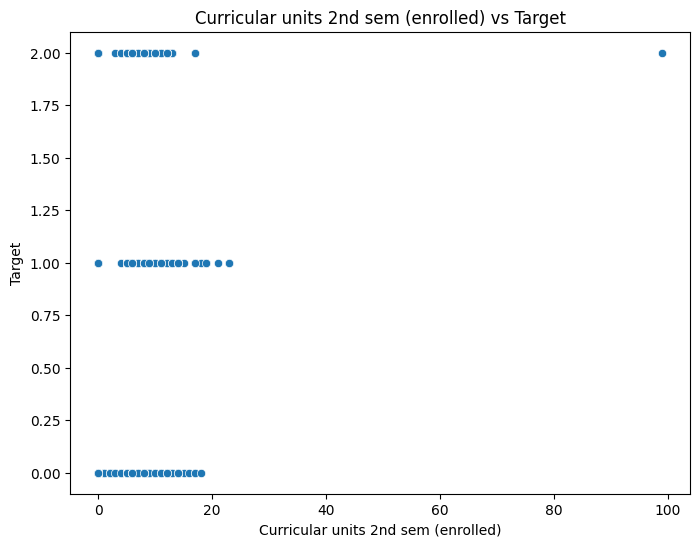

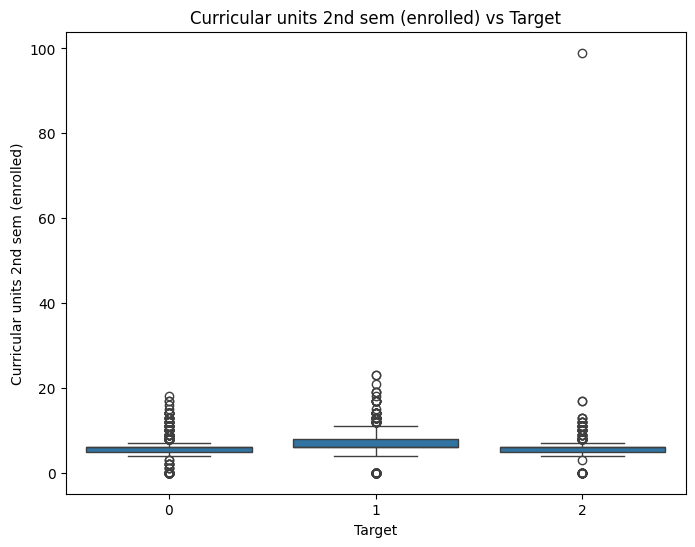

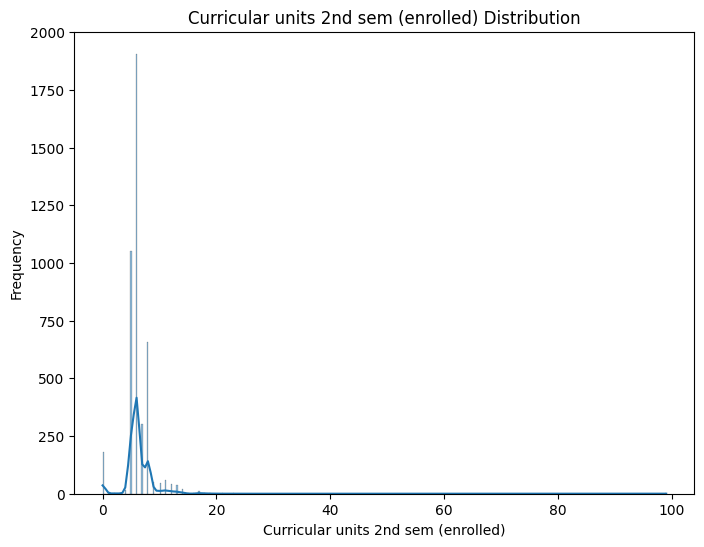

Correlation between Curricular units 2nd sem (enrolled) and Target: 0.06454475247592109


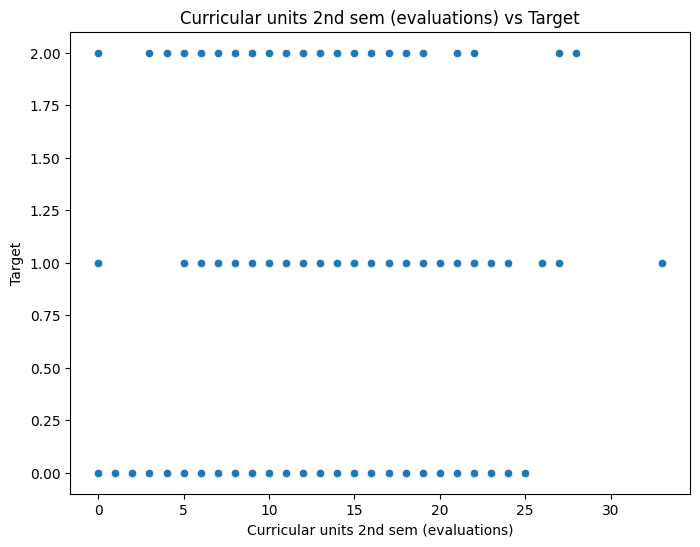

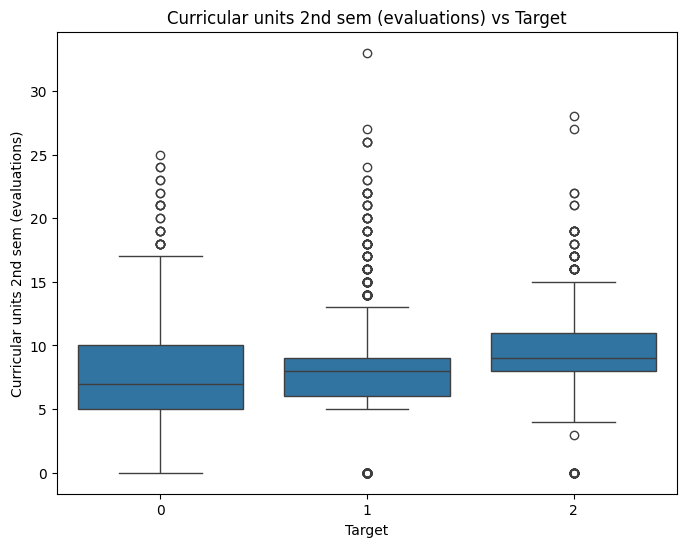

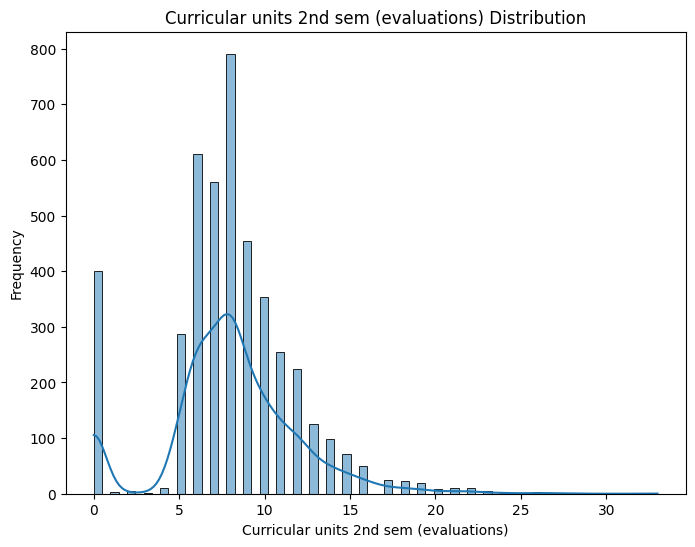

Correlation between Curricular units 2nd sem (evaluations) and Target: 0.1942064230609657


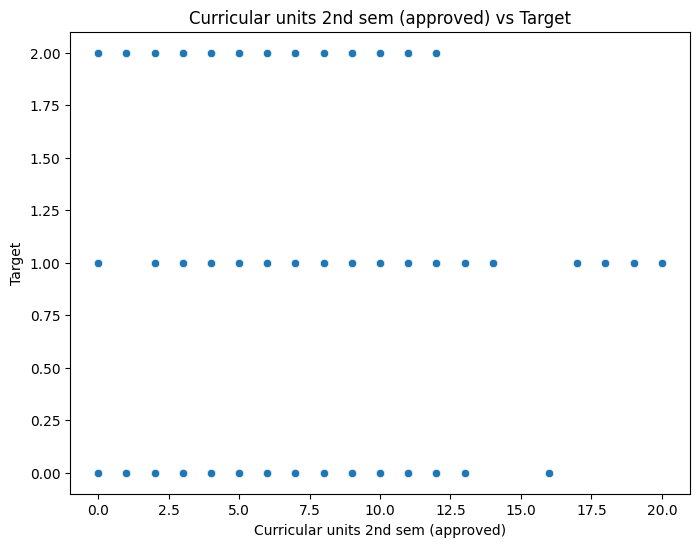

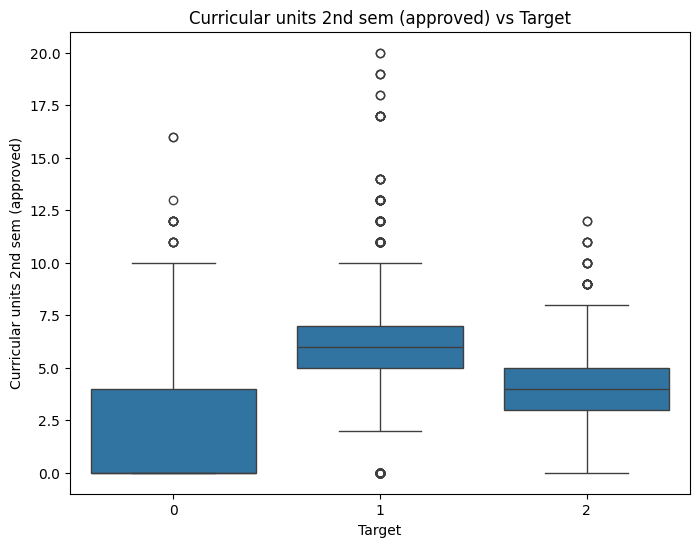

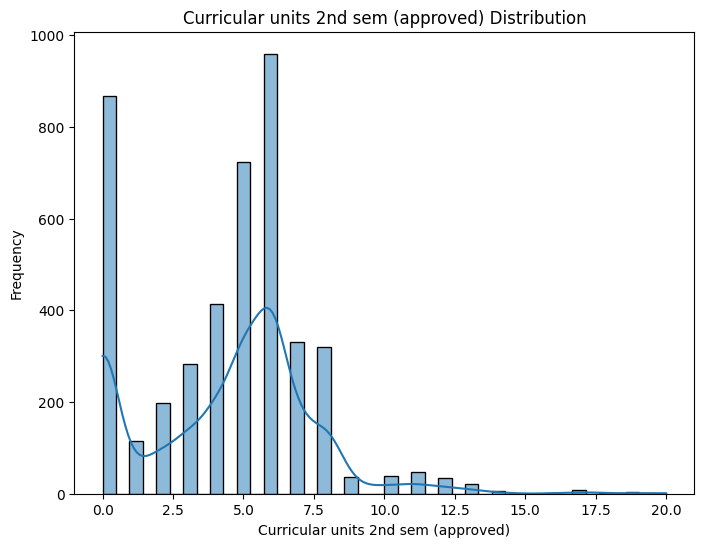

Correlation between Curricular units 2nd sem (approved) and Target: 0.35017790941418814


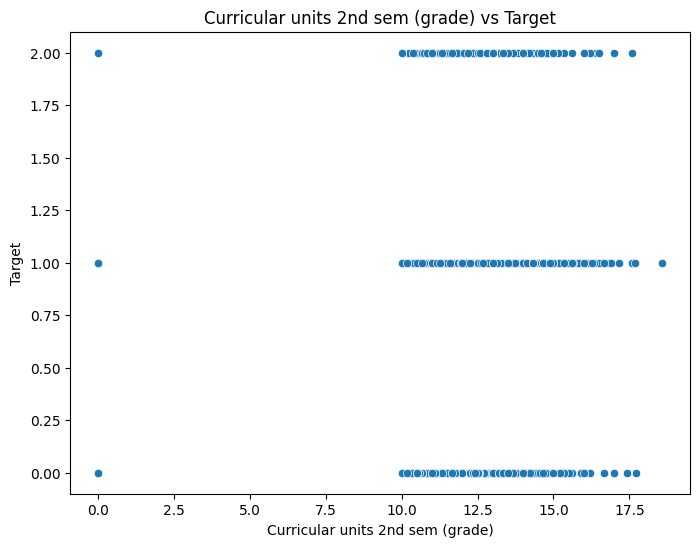

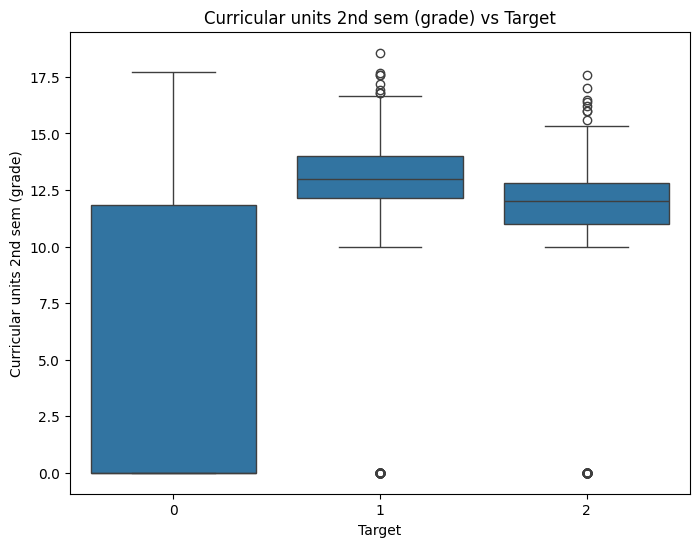

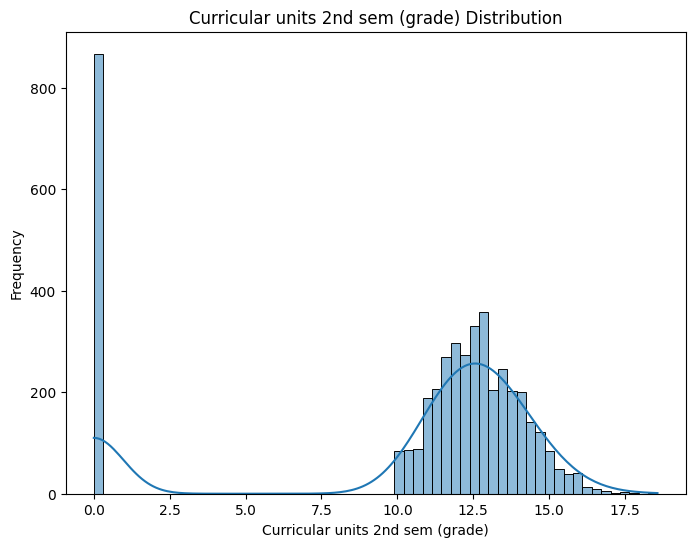

Correlation between Curricular units 2nd sem (grade) and Target: 0.42857395928344605


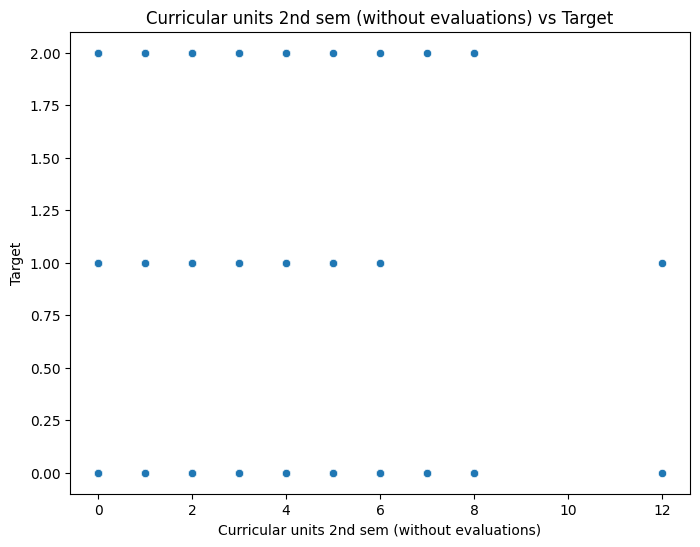

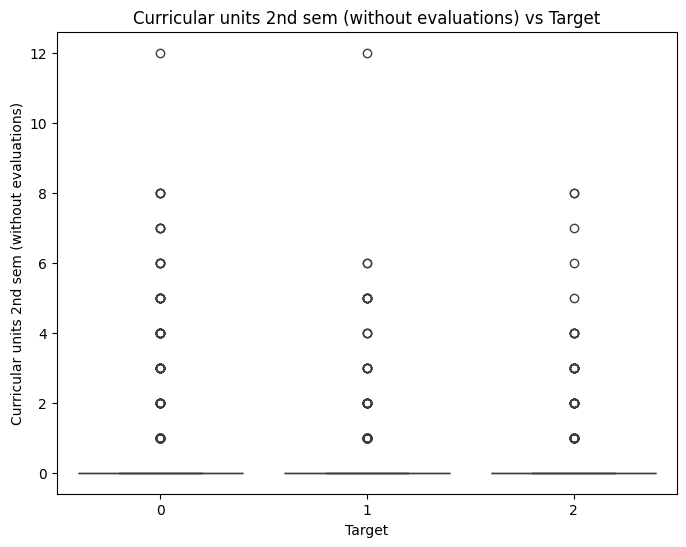

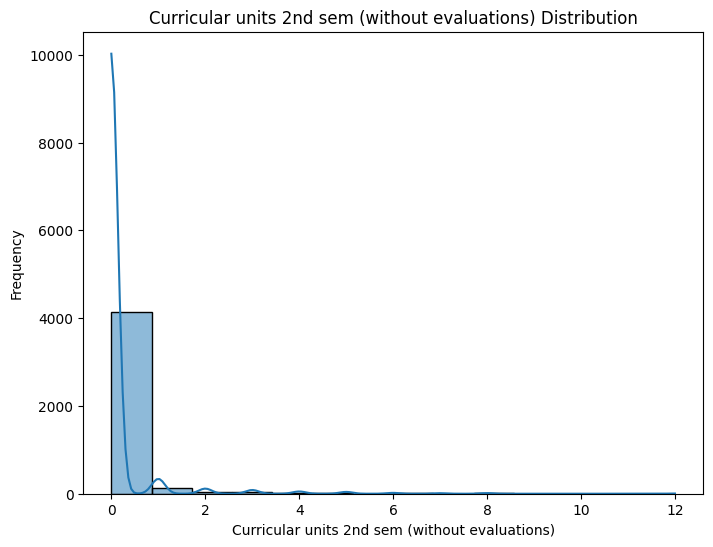

Correlation between Curricular units 2nd sem (without evaluations) and Target: -0.041067820352731044


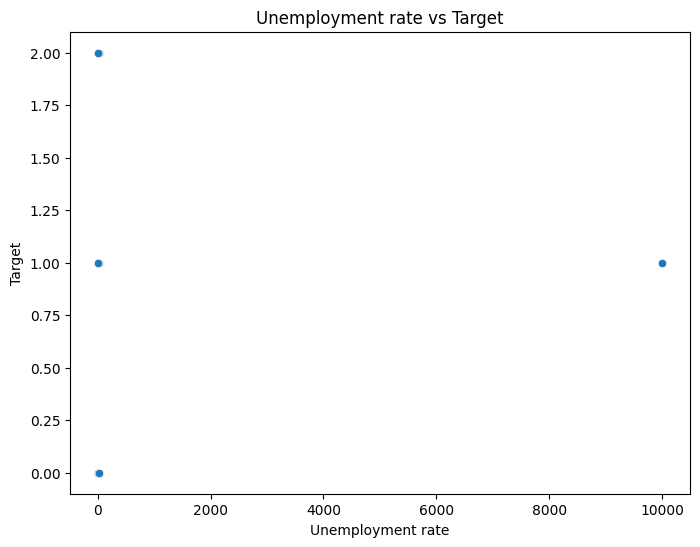

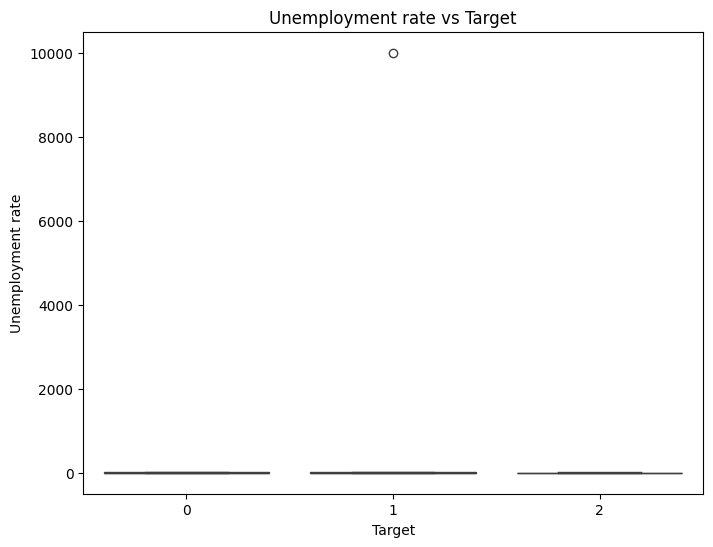

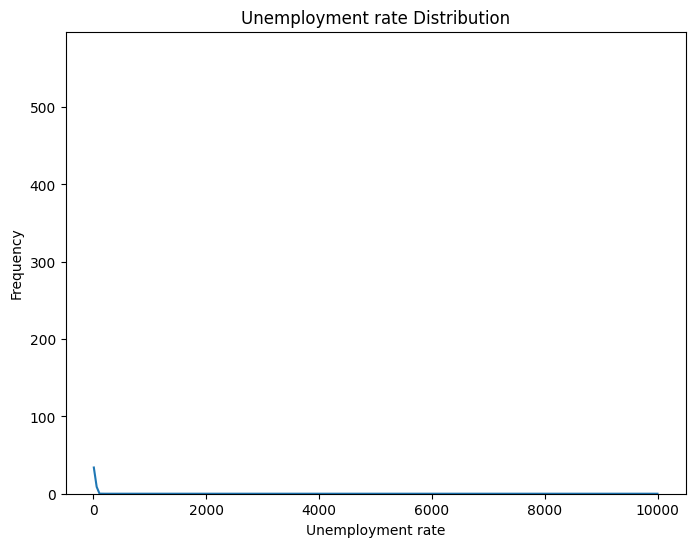

Correlation between Unemployment rate and Target: 0.002419521626282833


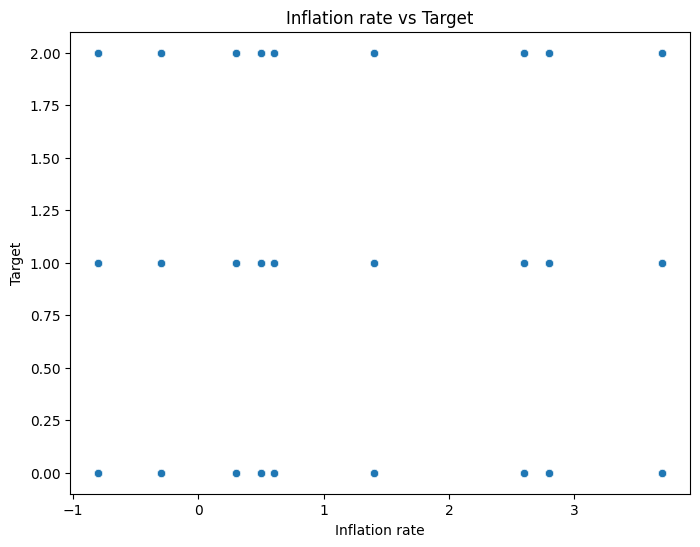

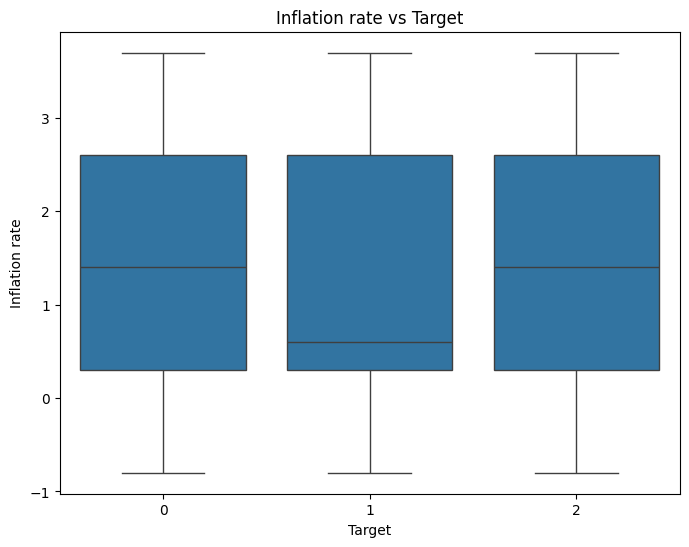

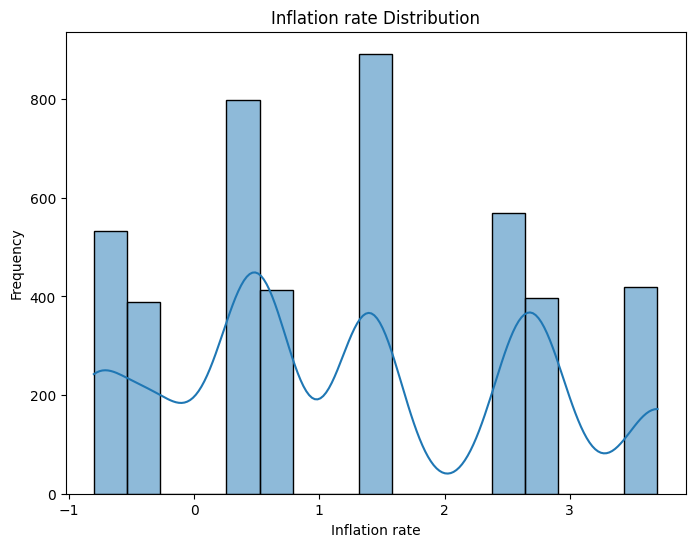

Correlation between Inflation rate and Target: -0.02248951459962246


In [502]:
# Analyse all columns with respect to target
analyze_all_columns(df, 'Target')

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


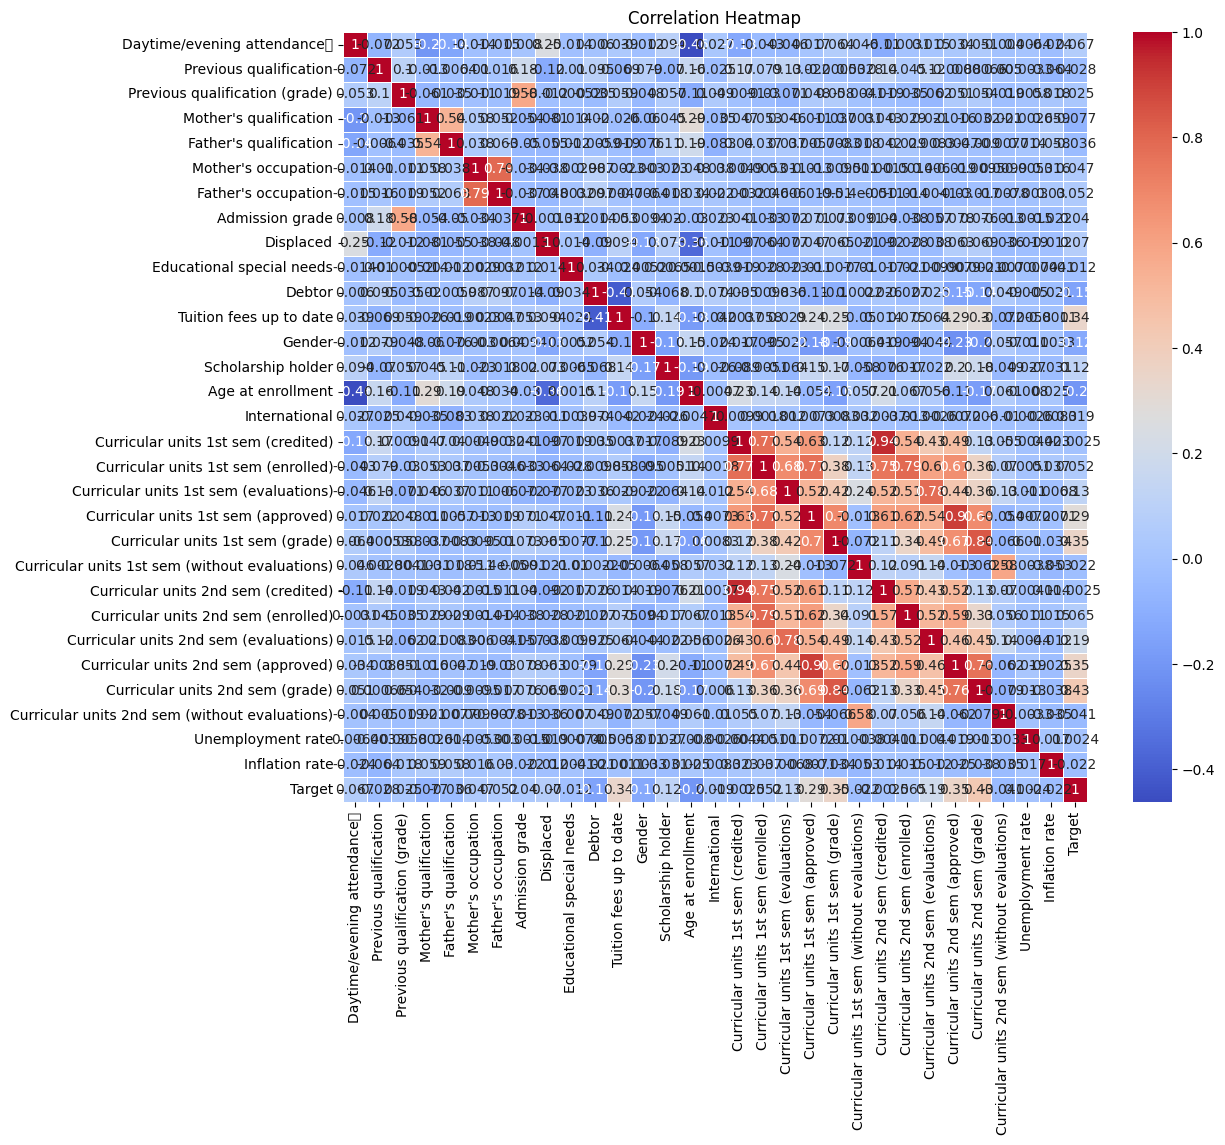

In [503]:
# Heat Map
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [504]:
# Select all of the features and drop default for X values
X = df.drop(['Target'], axis=1)
X.head() # print to show the X values

,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,...,Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate
0,1.0,1.0,122.0,19.0,12.0,5.0,9.0,127.3,1.0,0.0,...,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4
1,1.0,1.0,160.0,1.0,3.0,3.0,3.0,142.5,1.0,0.0,...,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3
2,1.0,1.0,122.0,37.0,37.0,9.0,9.0,124.8,1.0,0.0,...,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4
3,1.0,1.0,122.0,38.0,37.0,5.0,3.0,119.6,1.0,0.0,...,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8
4,0.0,1.0,100.0,37.0,38.0,9.0,9.0,141.5,0.0,0.0,...,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3


In [505]:
# define y value with default
y = df['Target']
y.head() # print to show the y values

,Target
0,0
1,1
2,0
3,1
4,1


In [506]:
# Function to calculate and display metrics
def evaluate_model(y_test, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print("Confusion Matrix:")
    plot_confusion_matrix(y_test, y_pred, model_name)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

# Function to plot consusion matrix
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Multinomial Logistic Regression

In [507]:
# Train and test, using 80% training and 20% testing with random state 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Stratify is used to deal with imbalanced datasets

In [508]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3529, 30)
(3529,)
(883, 30)
(883,)


In [509]:
X_train_logreg = sm.add_constant(X_train) # add constant for training data
X_test_logreg = sm.add_constant(X_test) # add constat for testing data
print(X_train_logreg.shape)
print(X_test_logreg.shape)

(3529, 31)
(883, 31)


In [510]:
mnlogregmodel = sm.MNLogit(y_train, X_train_logreg).fit() # fit the model
print(mnlogregmodel.summary()) # print the summary

Optimization terminated successfully.
         Current function value: 0.572473
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:                 Target   No. Observations:                 3529
Model:                        MNLogit   Df Residuals:                     3467
Method:                           MLE   Df Model:                           60
Date:                Fri, 06 Dec 2024   Pseudo R-squ.:                  0.4366
Time:                        04:50:32   Log-Likelihood:                -2020.3
converged:                       True   LL-Null:                       -3586.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      Target=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                               

In [511]:
y_hat = mnlogregmodel.predict(X_test_logreg) # predict
print(y_hat[:5])

             0         1         2
2459  0.036476  0.872146  0.091378
2434  0.376093  0.079598  0.544309
3985  0.027212  0.905972  0.066816
1738  0.056785  0.838342  0.104873
144   0.011499  0.936514  0.051987


In [512]:
# show first 5 predictions, use the class with higher probability
preds = np.argmax(y_hat, axis=1) # predict the model
print(preds[:5])

[1 2 1 1 1]



Model: Multinomial Logistic Regression

Confusion Matrix:


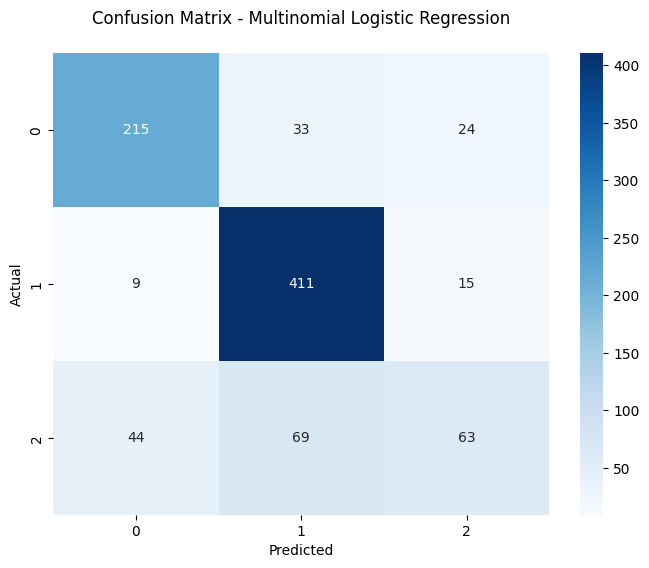


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       272
           1       0.80      0.94      0.87       435
           2       0.62      0.36      0.45       176

    accuracy                           0.78       883
   macro avg       0.74      0.70      0.71       883
weighted avg       0.76      0.78      0.76       883

Accuracy: 0.78


In [513]:
# Logistic Regression Analysis
evaluate_model(y_test, preds, "Multinomial Logistic Regression\n")

# Naive Bayes


Model: Naive Bayes

Confusion Matrix:


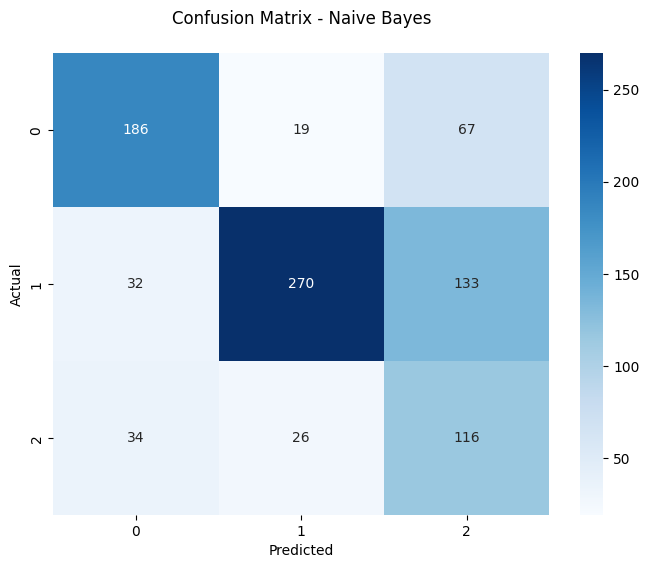


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       272
           1       0.86      0.62      0.72       435
           2       0.37      0.66      0.47       176

    accuracy                           0.65       883
   macro avg       0.65      0.65      0.63       883
weighted avg       0.72      0.65      0.67       883

Accuracy: 0.65


In [514]:
nb_model = nb() # Create the model
nb_model.fit(X_train, y_train) # Fit the model
preds = nb_model.predict(X_test) # Predict the model

# Naive Bayes Analysis
evaluate_model(y_test, preds, "Naive Bayes\n")

# KNN

Best KNN Parameters: {'n_neighbors': 5}

Model: K-Nearest Neighbors (KNN)

Confusion Matrix:


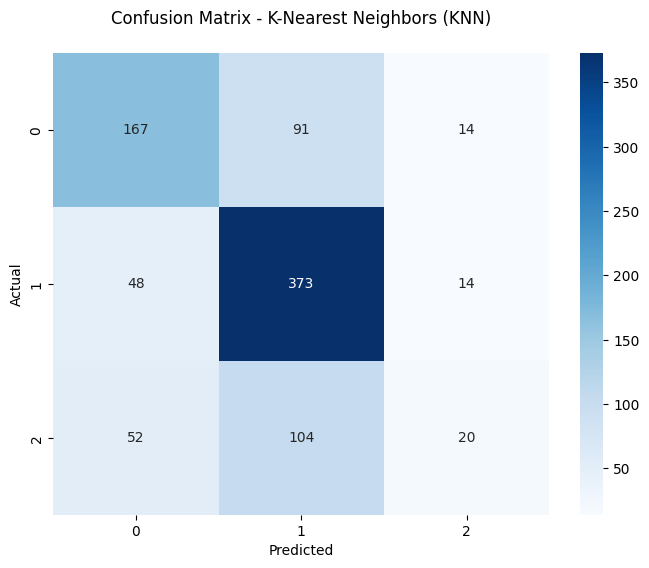


Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.61      0.62       272
           1       0.66      0.86      0.74       435
           2       0.42      0.11      0.18       176

    accuracy                           0.63       883
   macro avg       0.57      0.53      0.51       883
weighted avg       0.60      0.63      0.59       883

Accuracy: 0.63


In [515]:
# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
knn_model = knn() # Create the model
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy') # Grid search to find the best number of neighbors
grid_search.fit(X_train, y_train) # Fit the model with the best knn
best_knn = grid_search.best_estimator_ # Get the best knn
print(f"Best KNN Parameters: {grid_search.best_params_}")
preds = best_knn.predict(X_test) # Predict the model
evaluate_model(y_test, preds, "K-Nearest Neighbors (KNN)\n")